In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib 
from matplotlib import pyplot as plt
import gc
import multiprocessing as mp
from multiprocessing import Process, Queue
queue = Queue()
import random
from matplotlib.pyplot import figure

In [2]:
def read_df(file_title,house_nb):
    try:
        df=pd.read_table(file_title, sep="," )
        df.columns = ["time","consumption"]
        try:
            df['time'] = pd.to_datetime(df['time'],unit='s')
        except:
            df['time'] = pd.to_datetime(df['time'])
        df.index= df.time
        df = df.sort_index()
        df.reset_index(drop=True, inplace=True)
        return (df,house_nb)
    except:
        return(None)

In [3]:
def find_ON_consumptions(dataframe,house_nb,threshold):
  on_consumption=[]
  flag=False 
  beginning=0
  end=0
  thresh=threshold[house_nb]
  for index in dataframe.index[0:]:
     current_pow = dataframe.consumption[index]
     if (current_pow>=thresh) and (flag==False):
      beginning=index
      flag=True
     if (current_pow<(thresh/2)) and (flag==True):
       end=index-1
       on_consumption.append((beginning,end))
       flag=False
  return(on_consumption,house_nb)

In [4]:
pool = mp.Pool(processes = 3)
result=pool.starmap(read_df,(("Refit_Resampled/fridge/house_"+str(i+1)+".csv",i+1) for i in range(21)))

In [5]:
Refit_fridges={}
for i in range(len(result)):
    if result[i]!=None:
        Refit_fridges[result[i][1]]=result[i][0]

In [6]:
Refit_fridge_thresholds={1:60,4:40,7:60,8:110,11:25,18:80,20:60}

In [8]:
pool = mp.Pool(processes = 3)
result=pool.starmap(find_ON_consumptions,((Refit_fridges[i],i,Refit_fridge_thresholds) for i in Refit_fridges.keys()))

In [9]:
Refit_fridge_activations={}
for i in range(len(result)):
    Refit_fridge_activations[result[i][1]]=result[i][0]

In [10]:
Refit_fridge_activations.keys()

dict_keys([1, 4, 7, 8, 11, 18, 20])

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


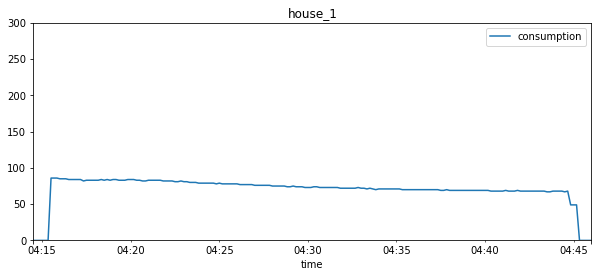

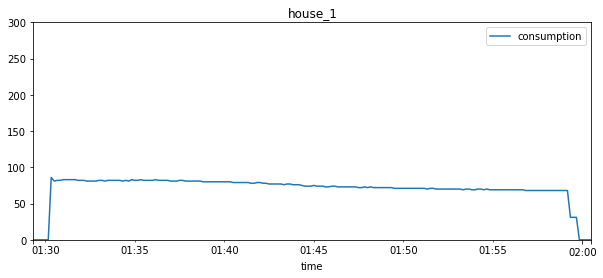

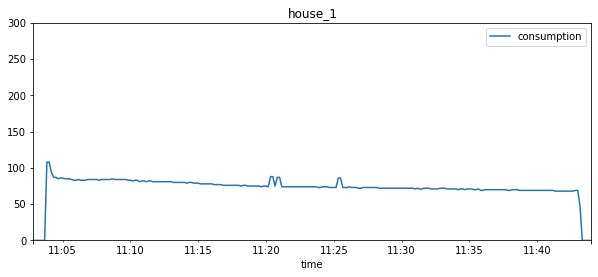

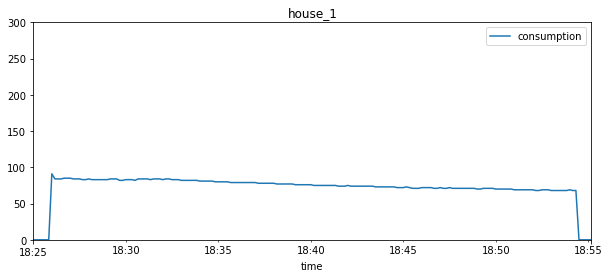

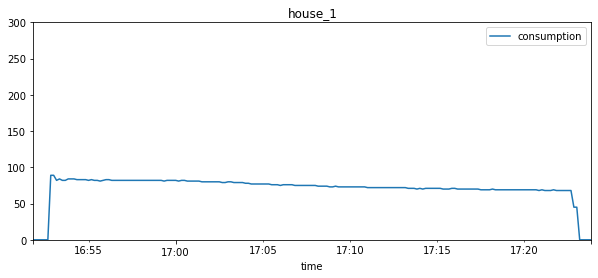

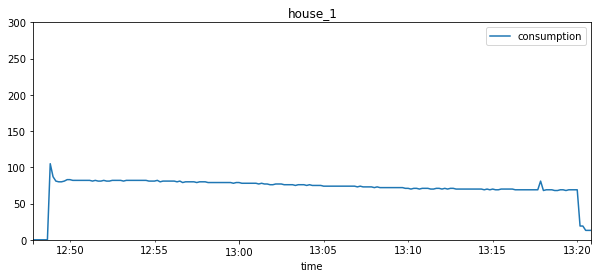

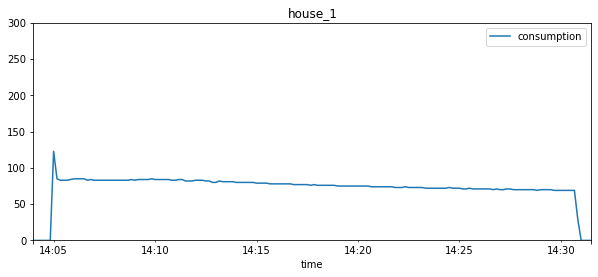

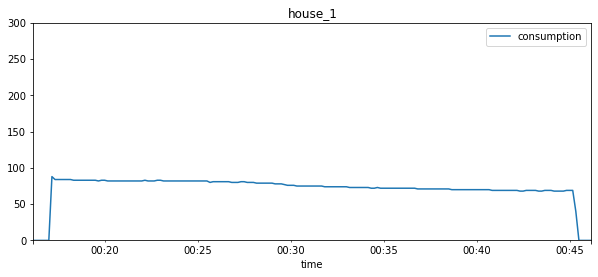

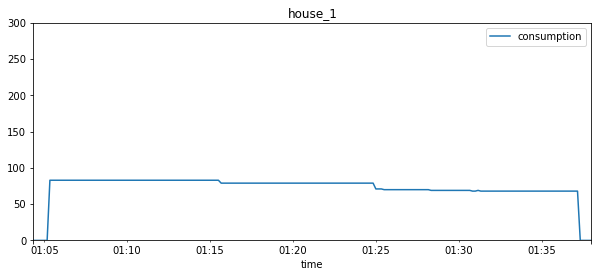

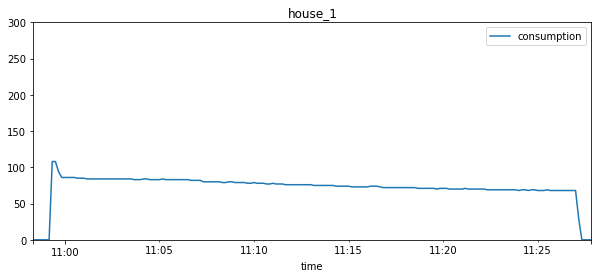

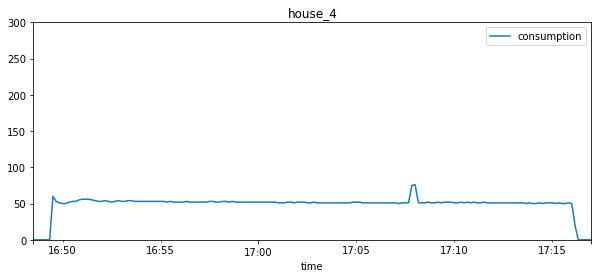

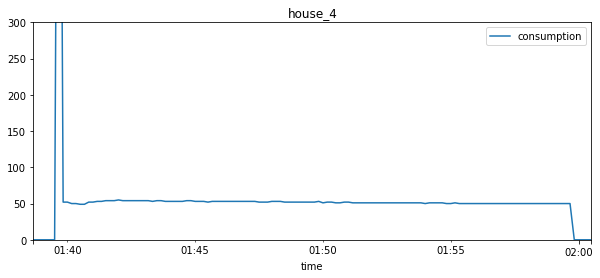

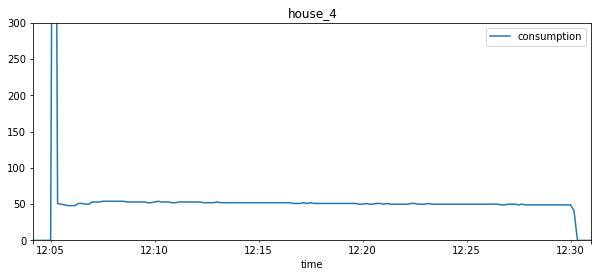

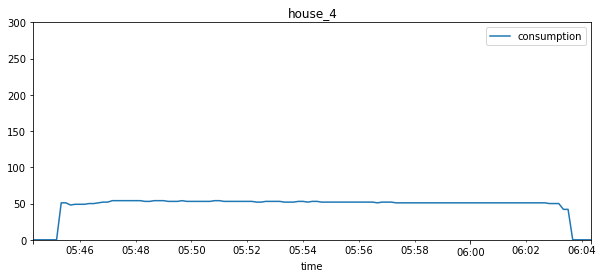

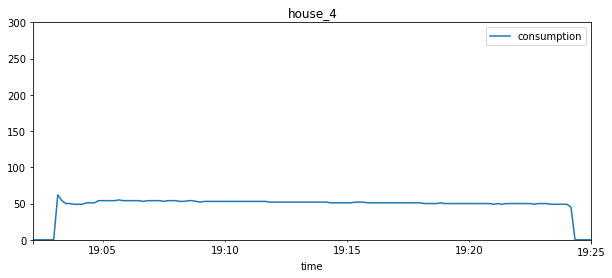

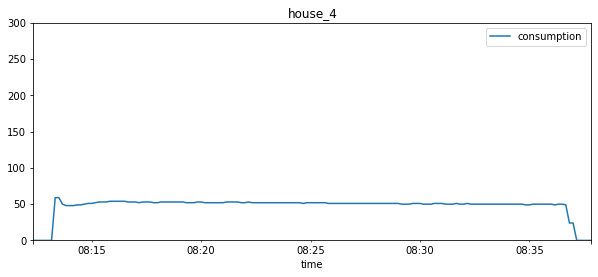

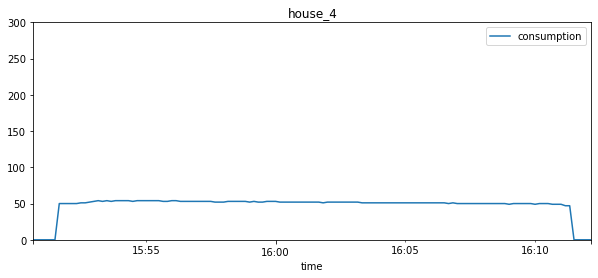

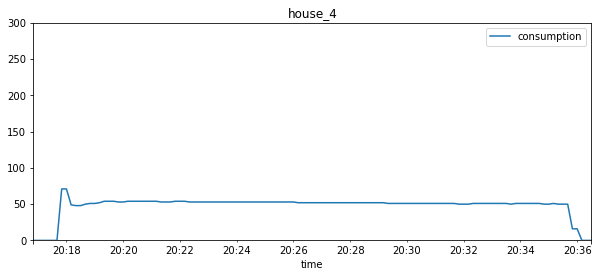

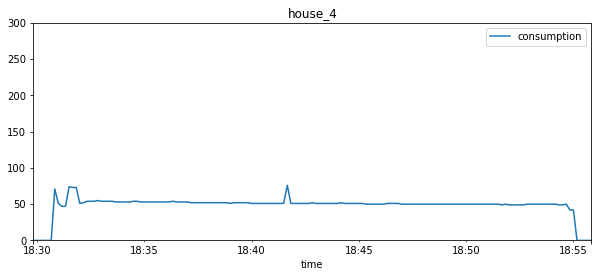

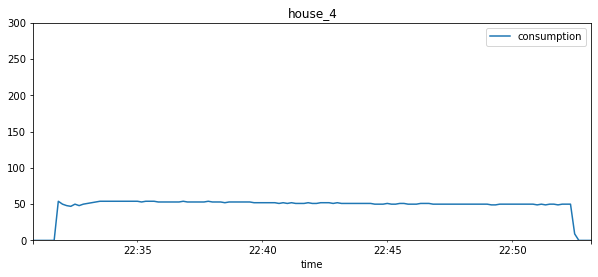

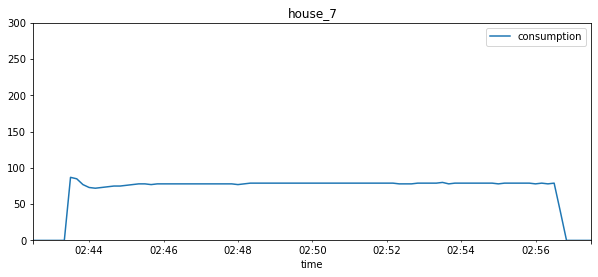

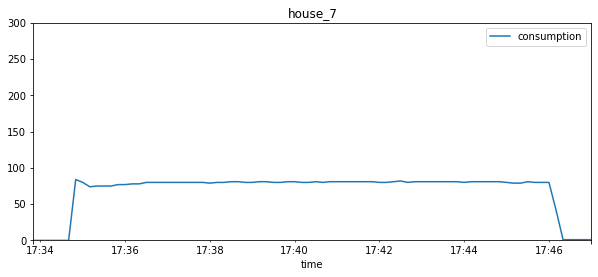

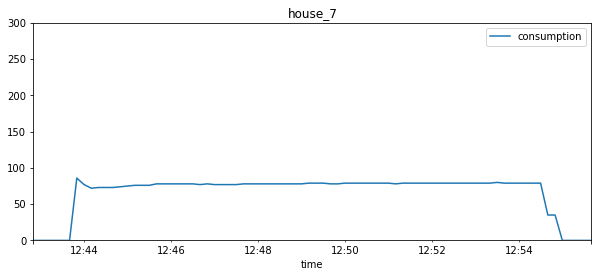

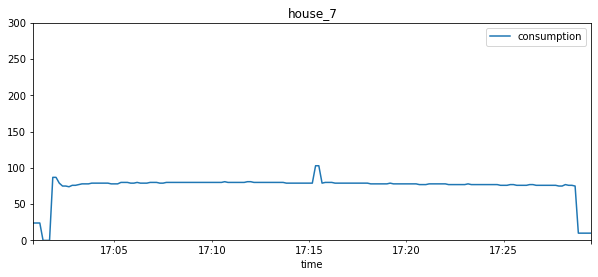

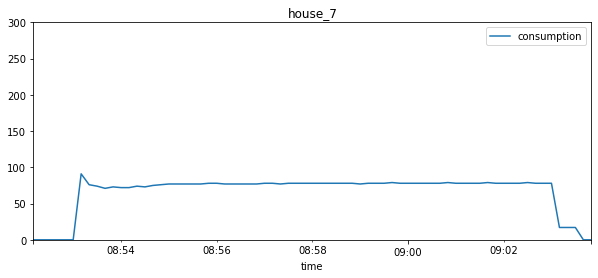

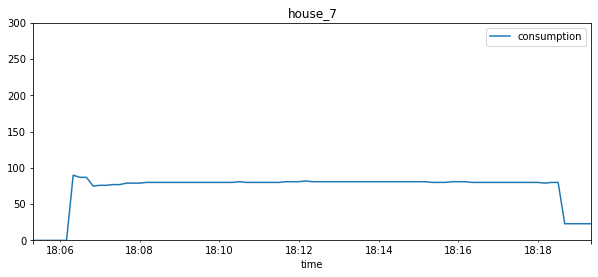

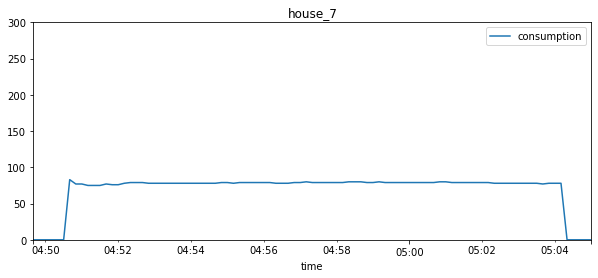

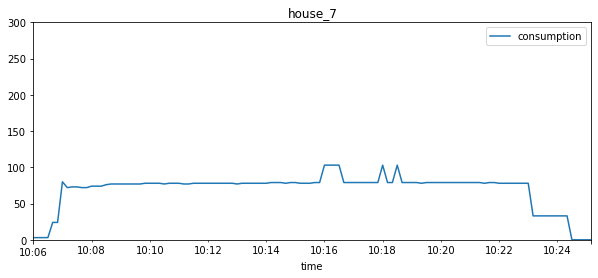

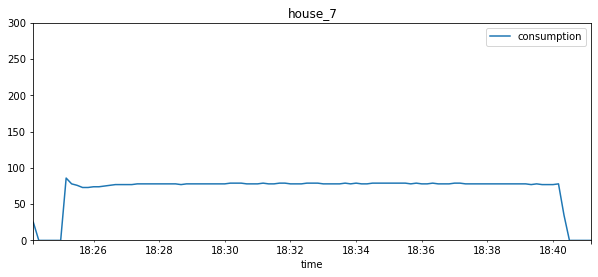

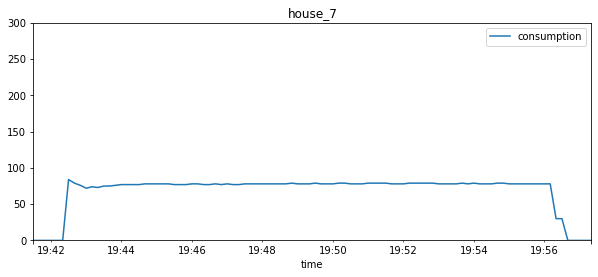

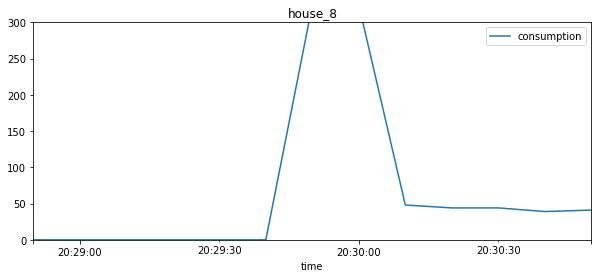

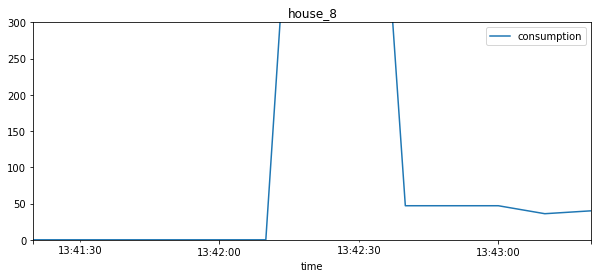

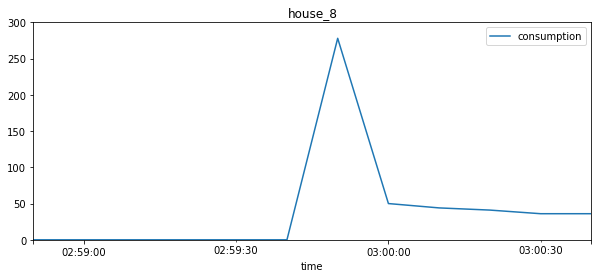

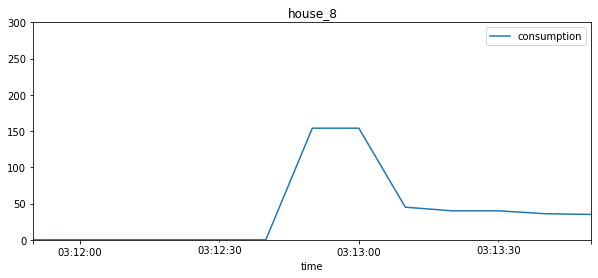

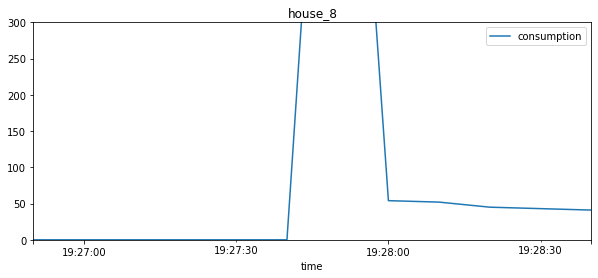

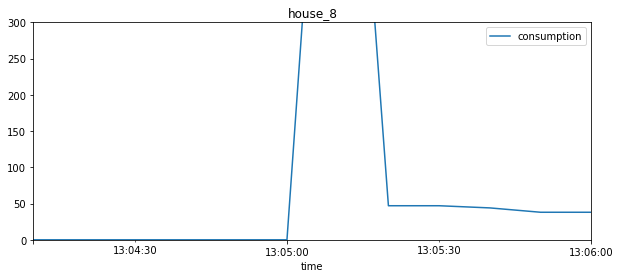

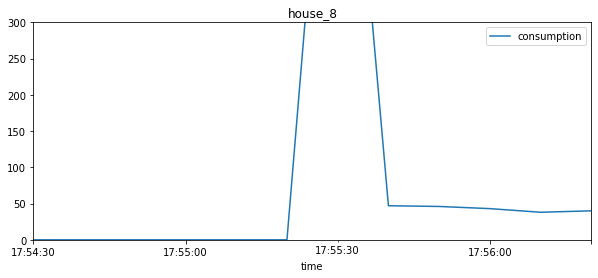

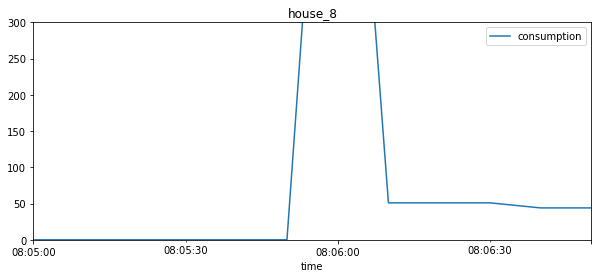

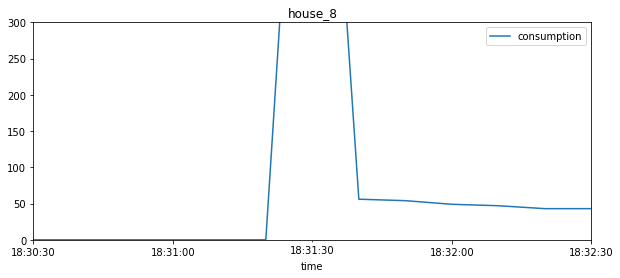

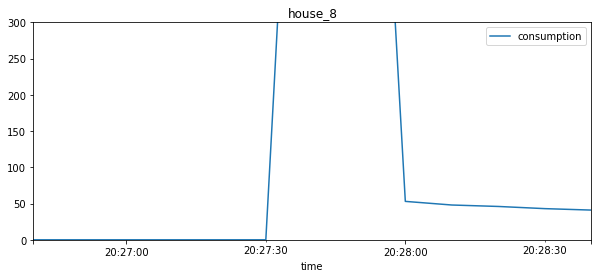

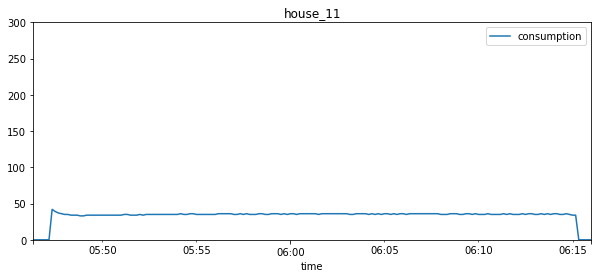

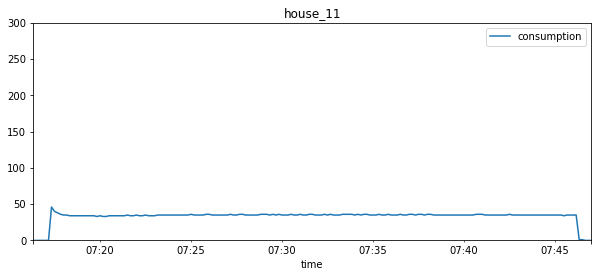

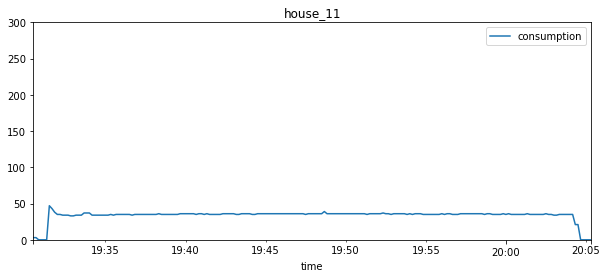

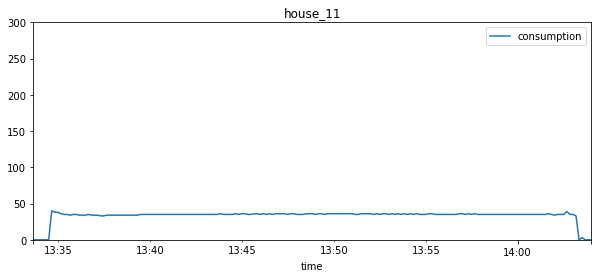

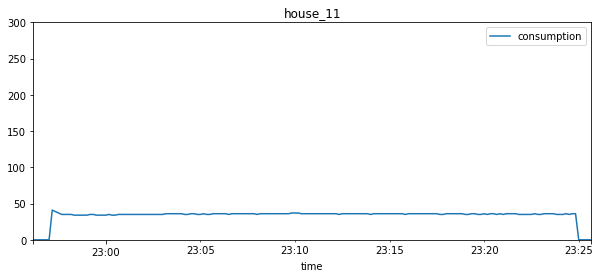

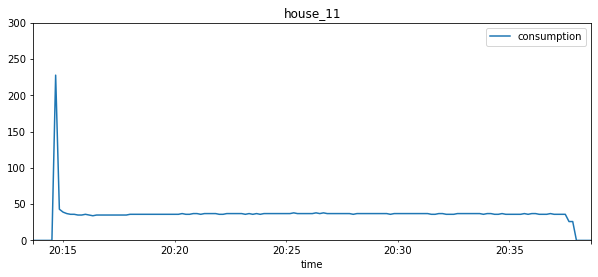

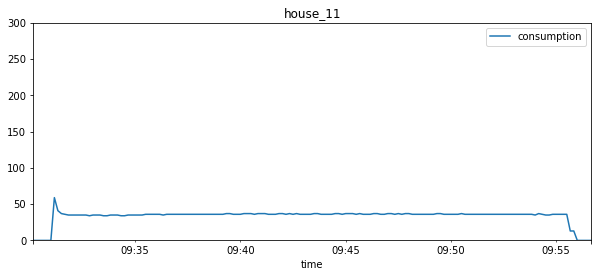

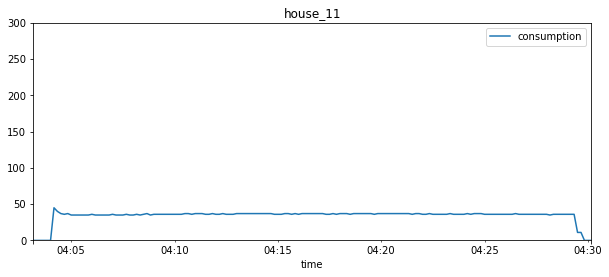

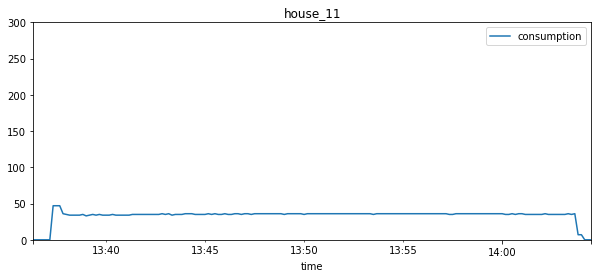

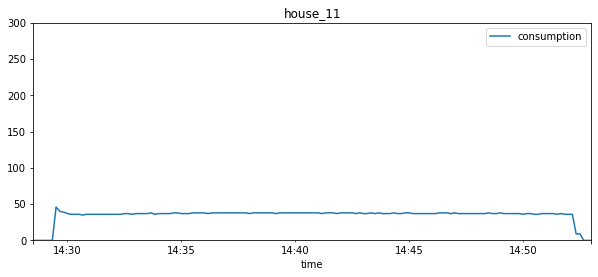

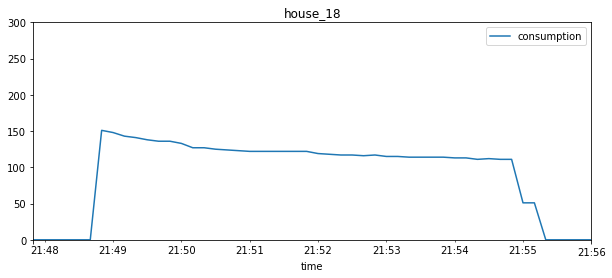

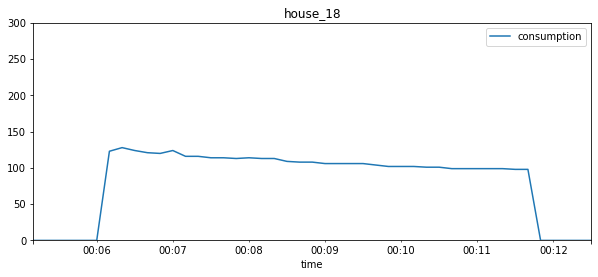

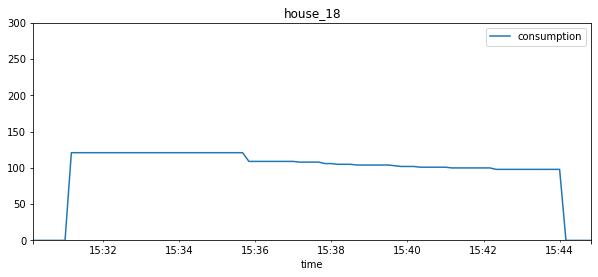

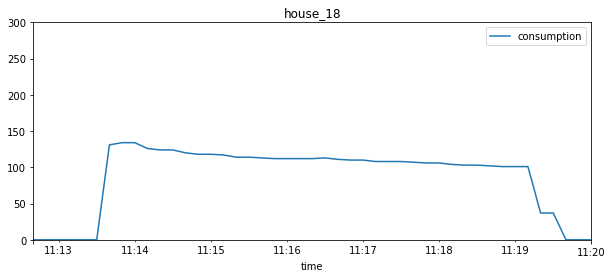

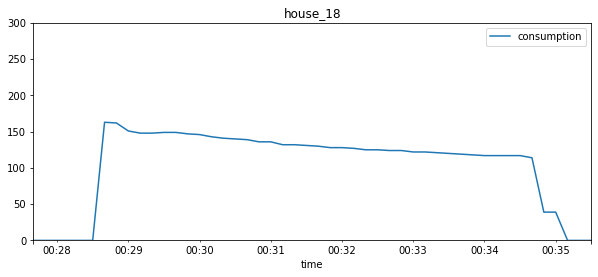

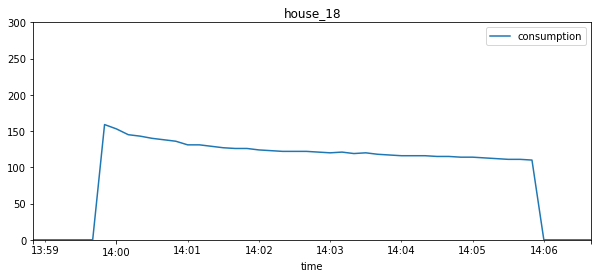

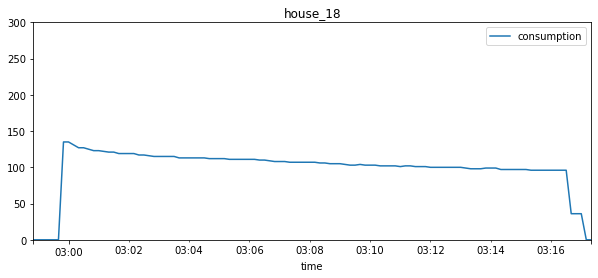

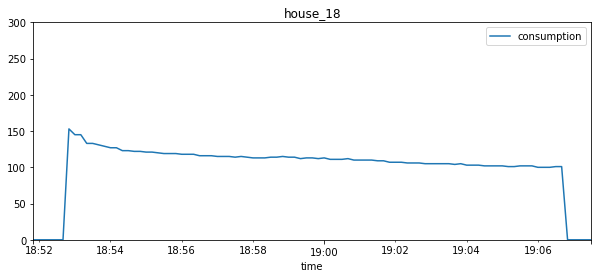

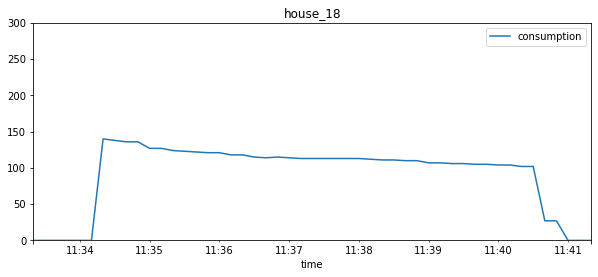

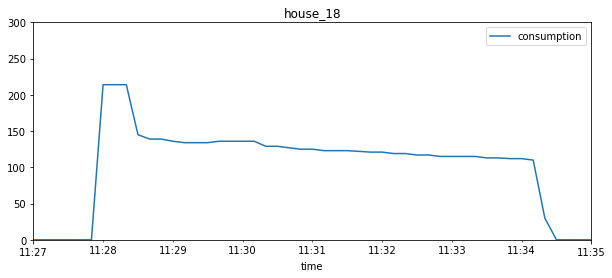

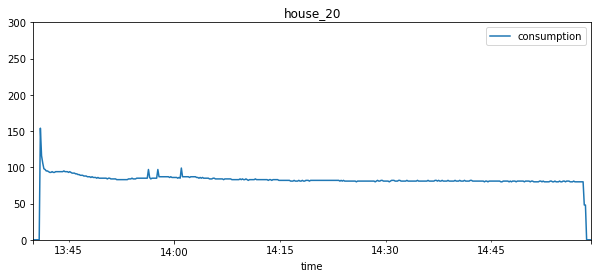

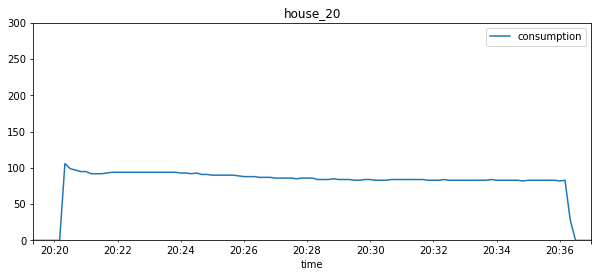

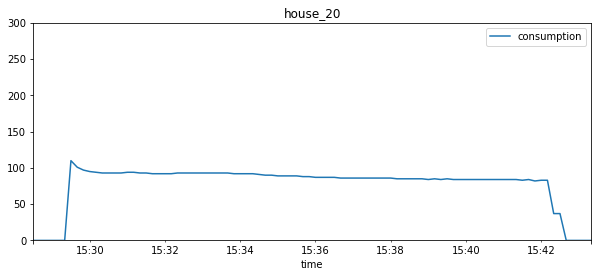

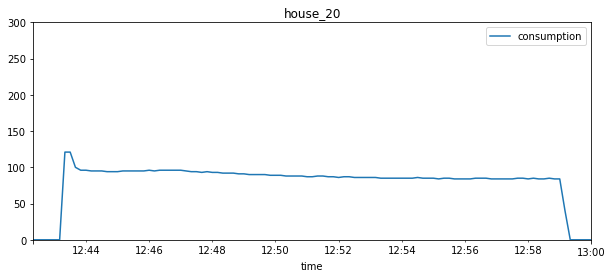

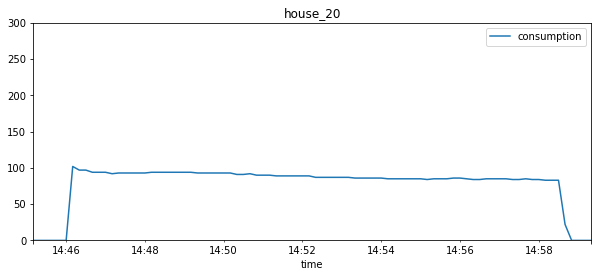

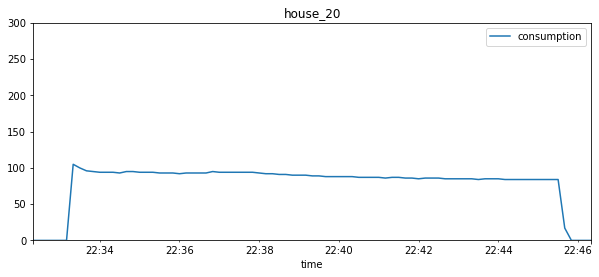

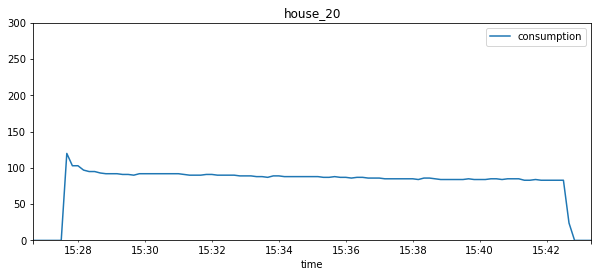

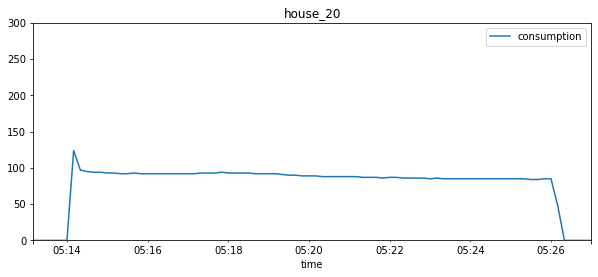

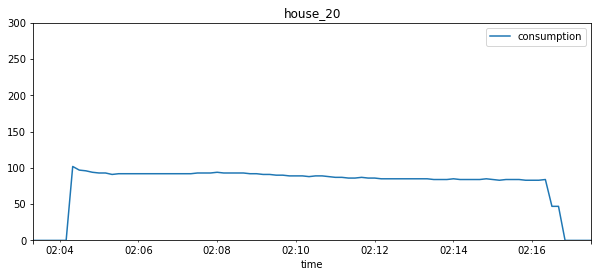

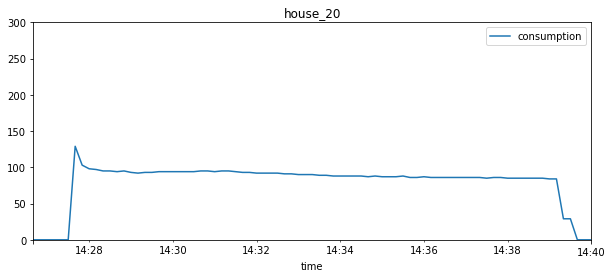

In [11]:
for house in Refit_fridges.keys():
    activations=random.sample(range(0, len(Refit_fridge_activations[house])),10)
    df=Refit_fridges[house]
    for activation in activations:
        beginning=Refit_fridge_activations[house][activation][0]
        end=Refit_fridge_activations[house][activation][1]
        ax=df.iloc[beginning-6:end+6].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
        ax.set_ylim(0,300)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


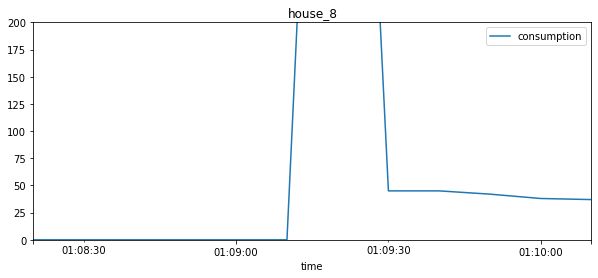

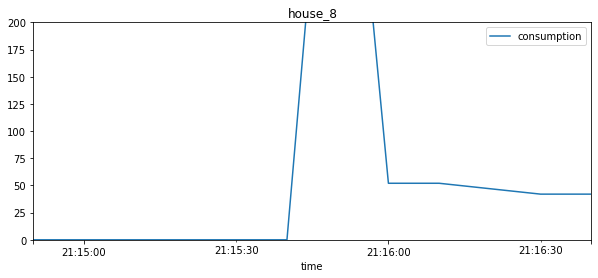

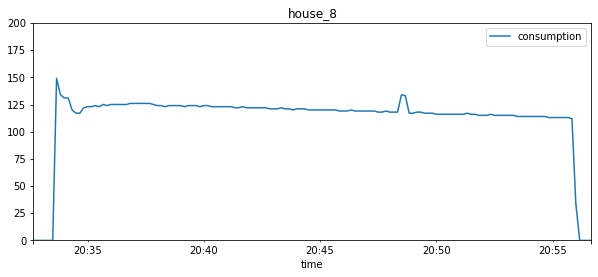

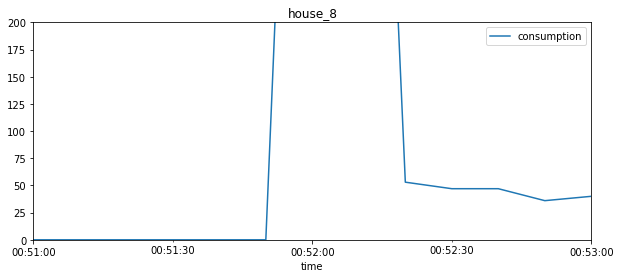

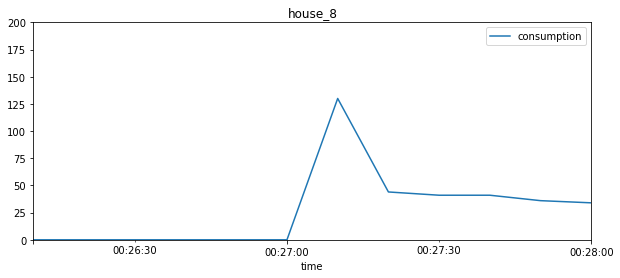

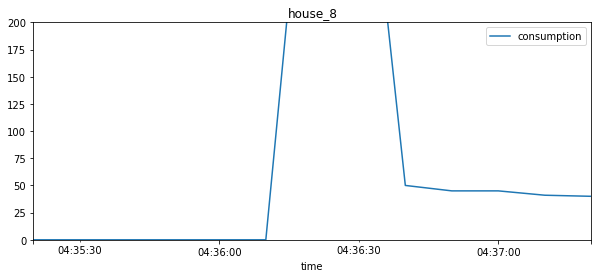

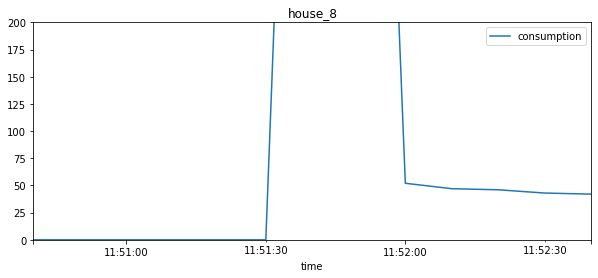

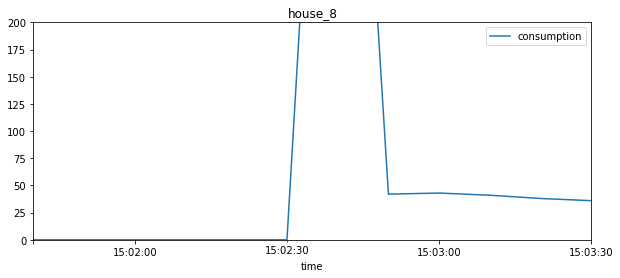

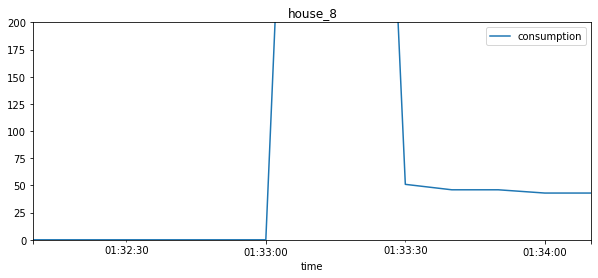

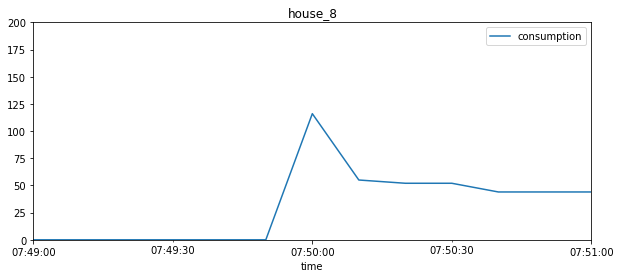

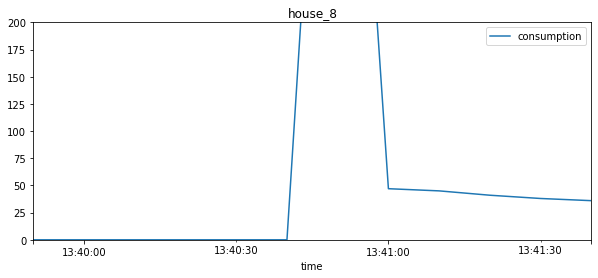

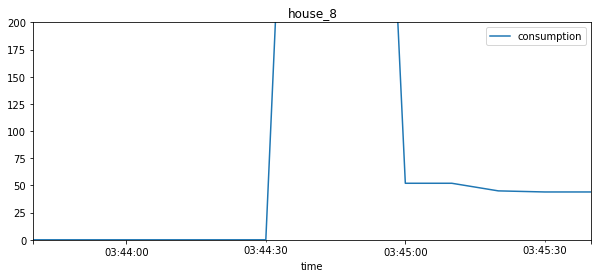

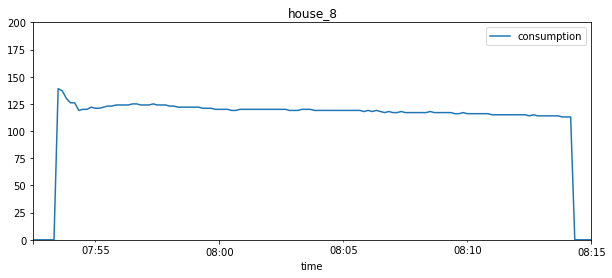

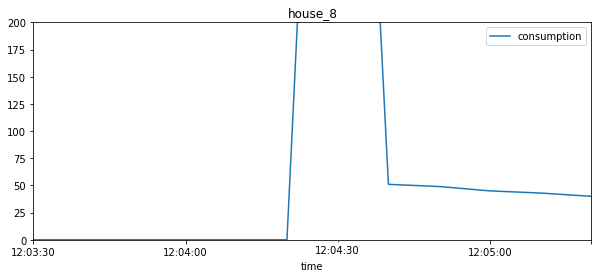

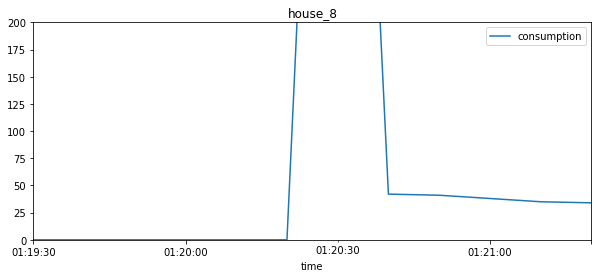

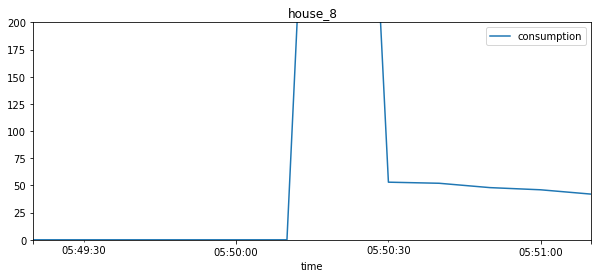

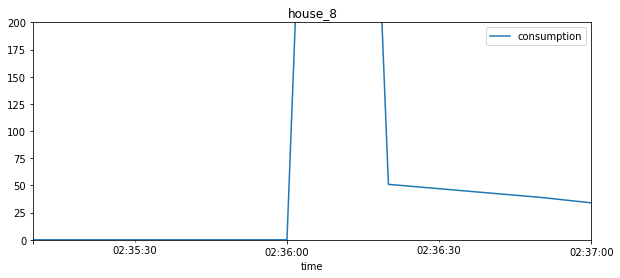

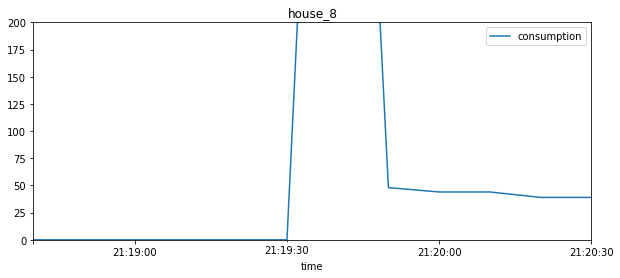

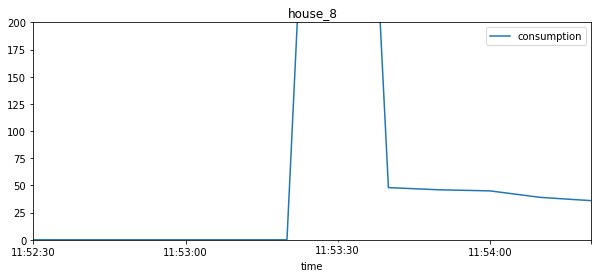

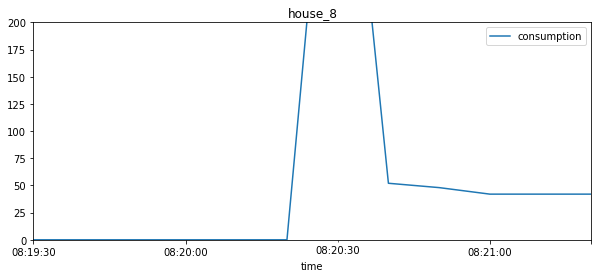

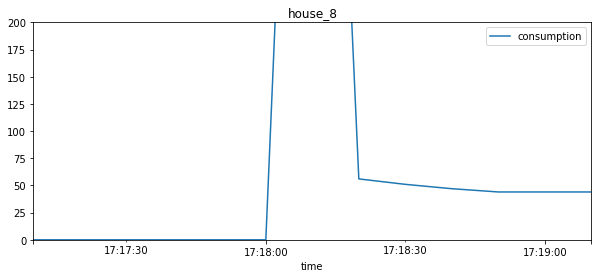

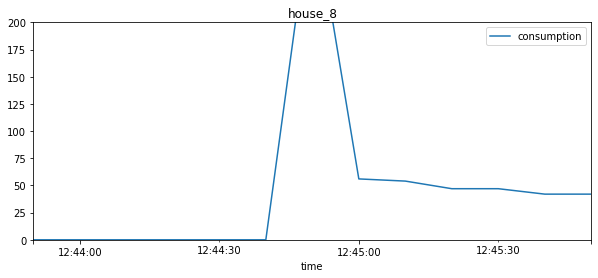

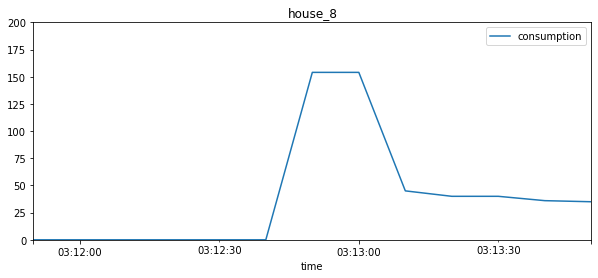

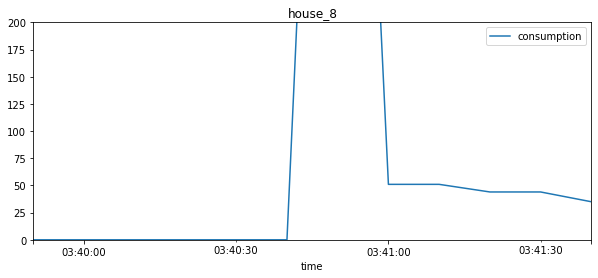

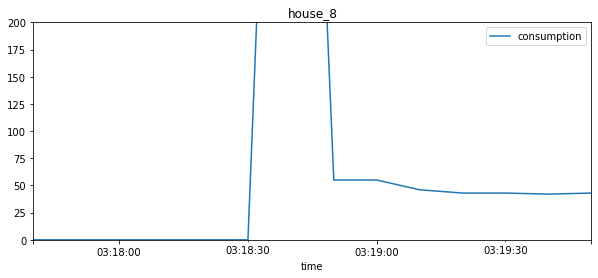

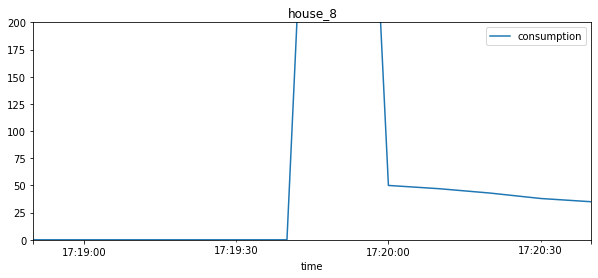

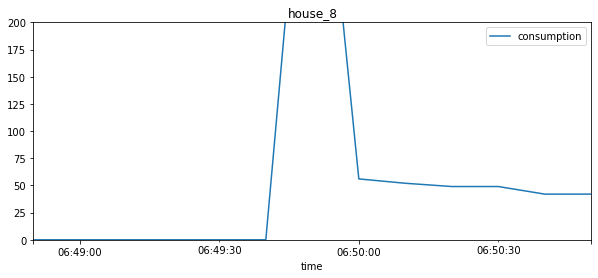

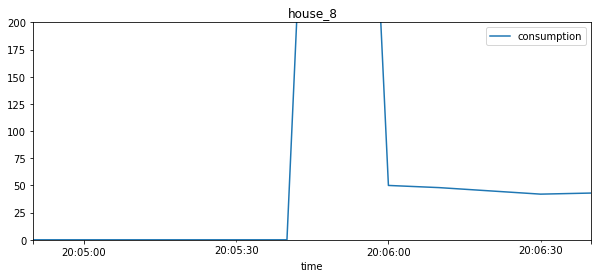

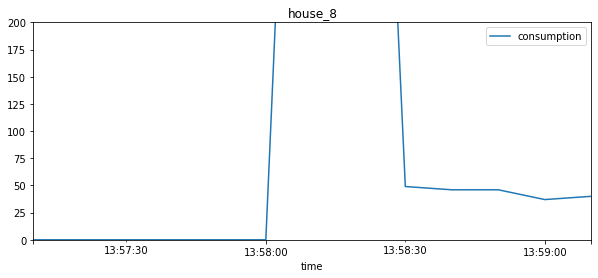

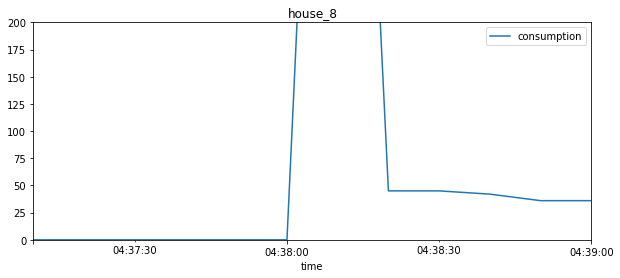

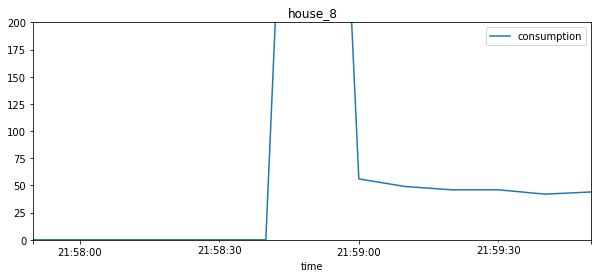

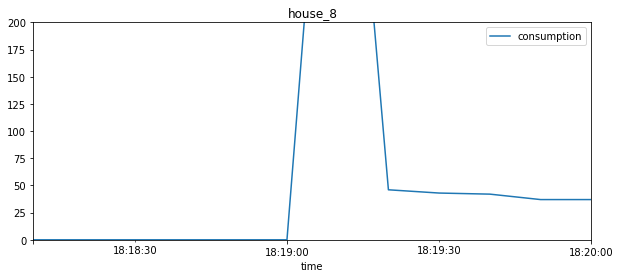

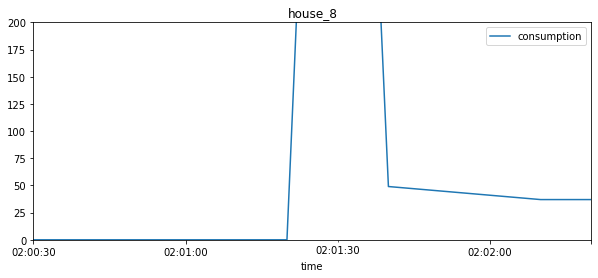

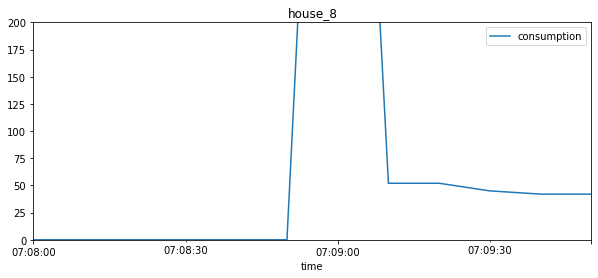

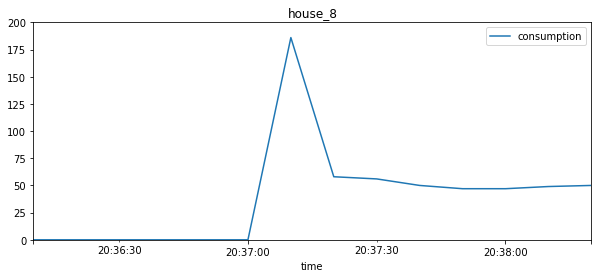

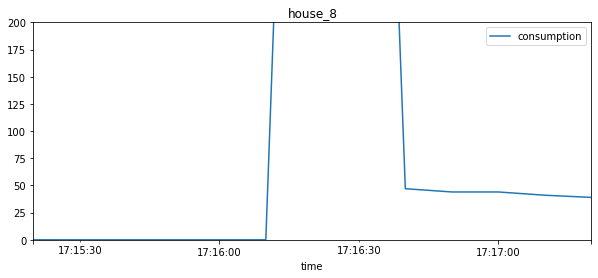

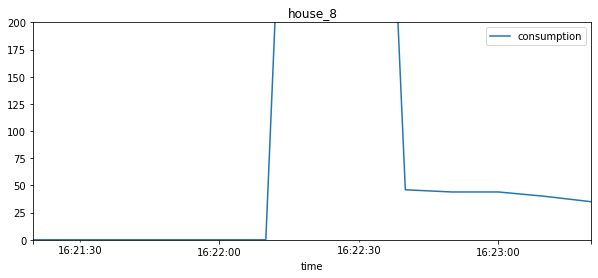

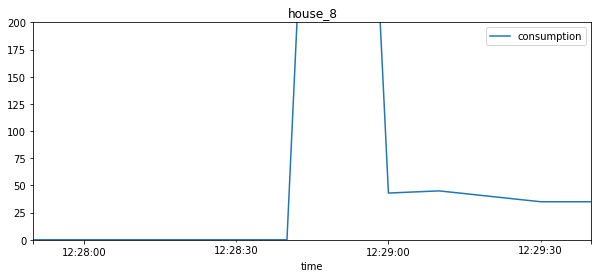

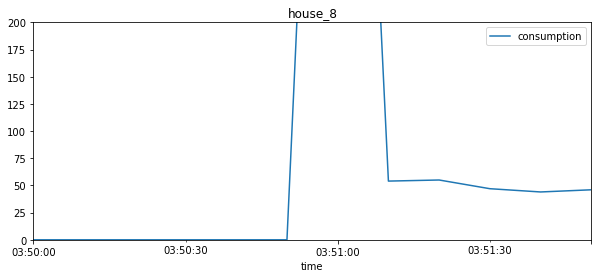

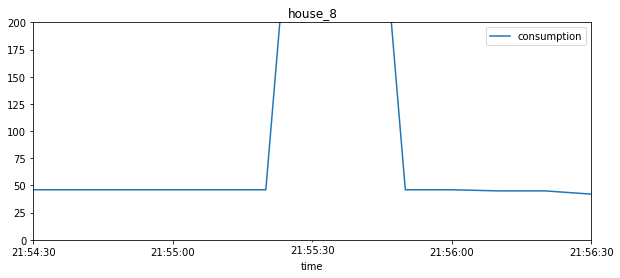

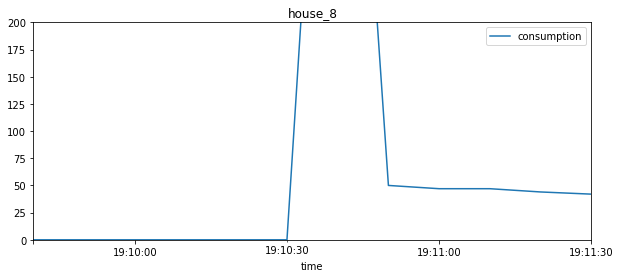

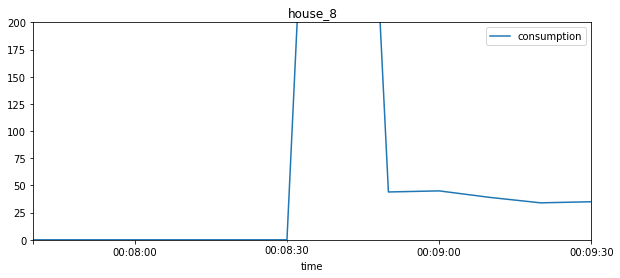

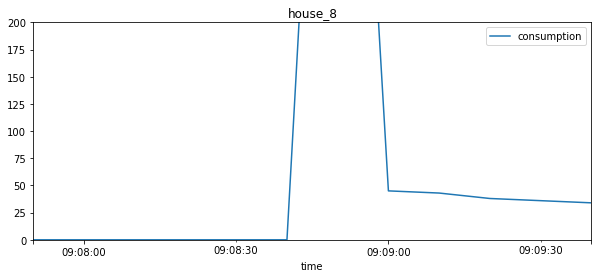

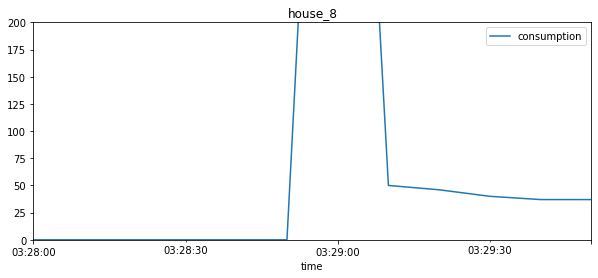

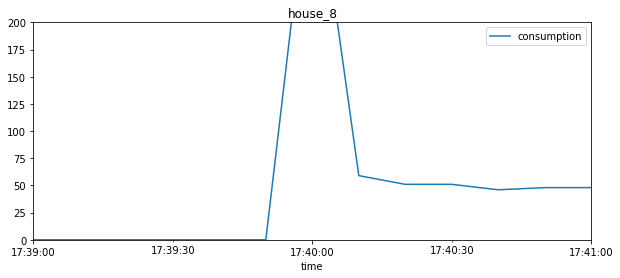

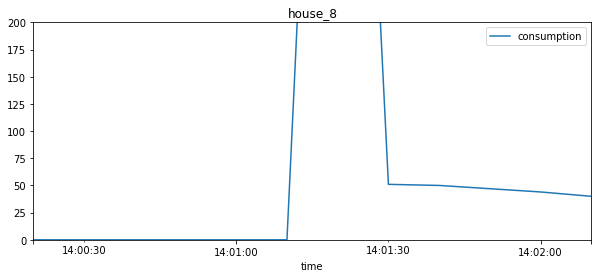

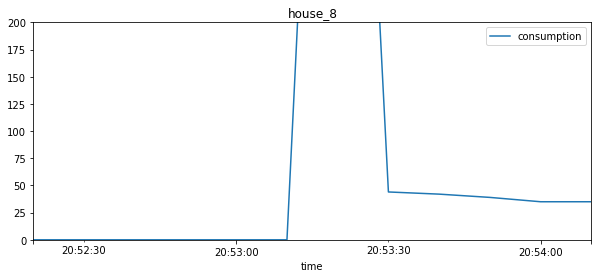

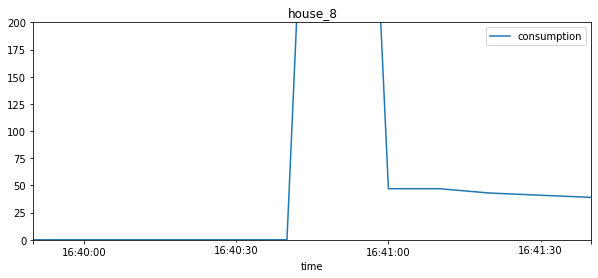

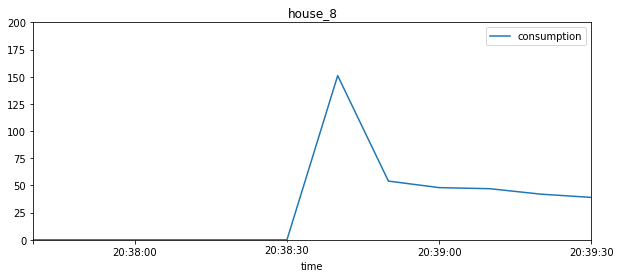

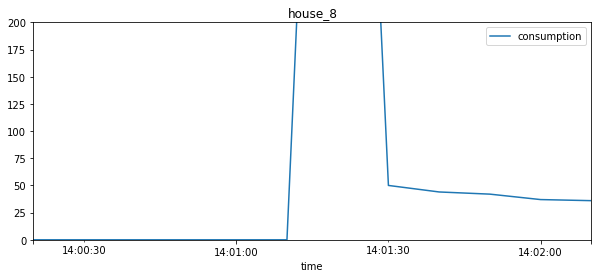

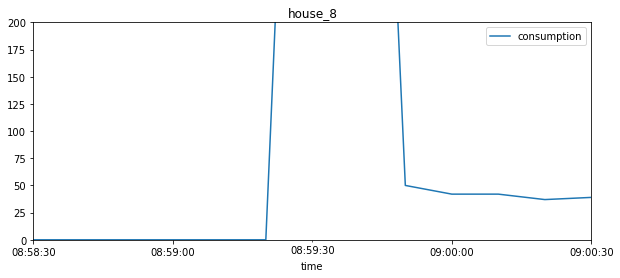

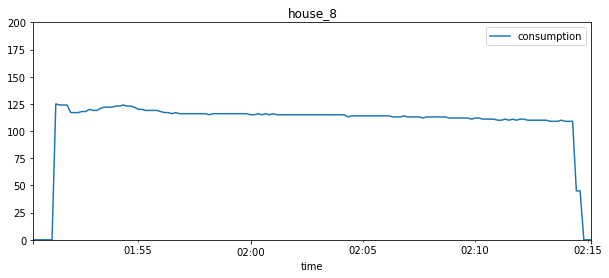

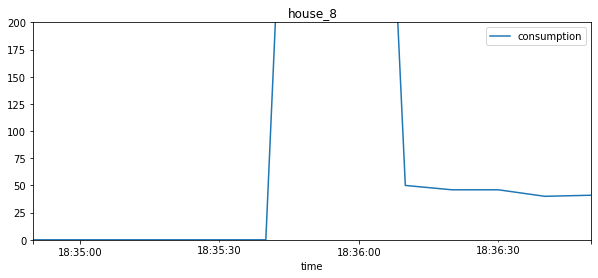

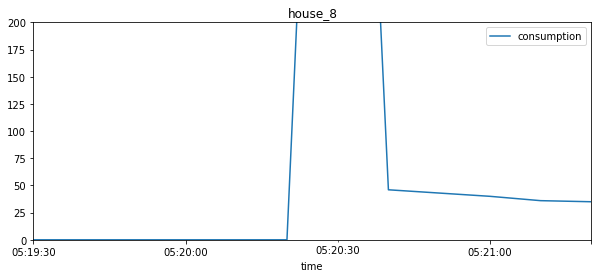

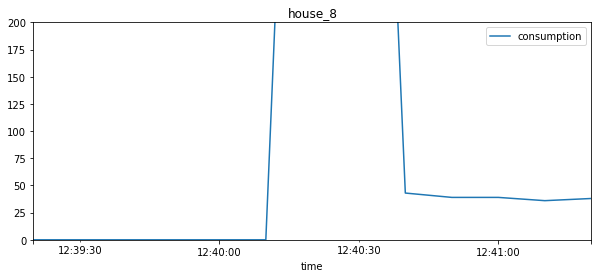

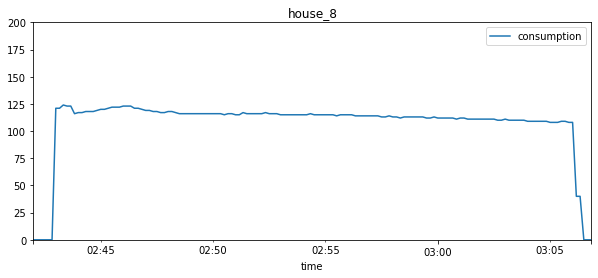

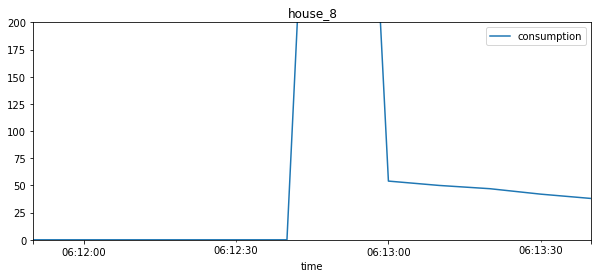

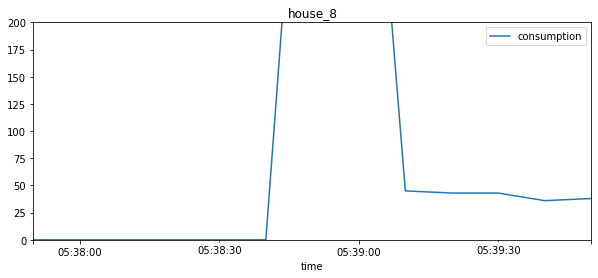

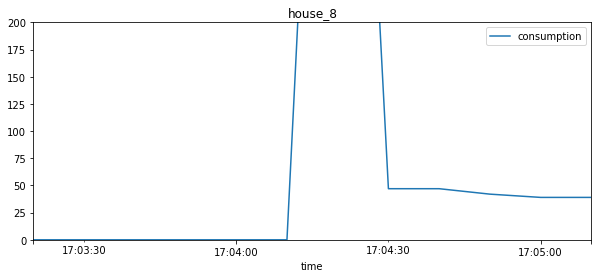

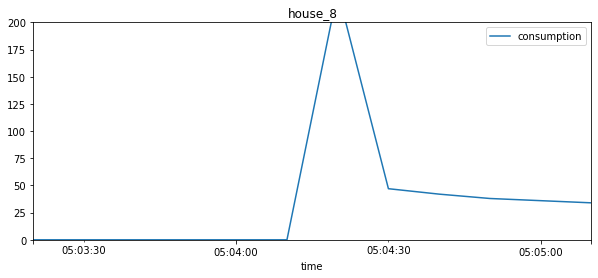

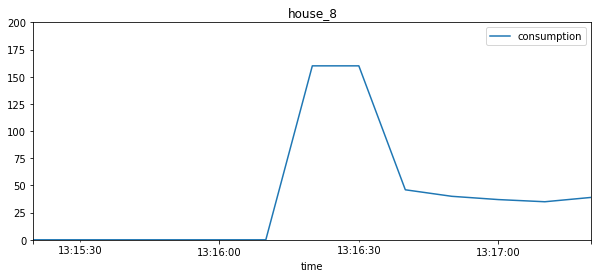

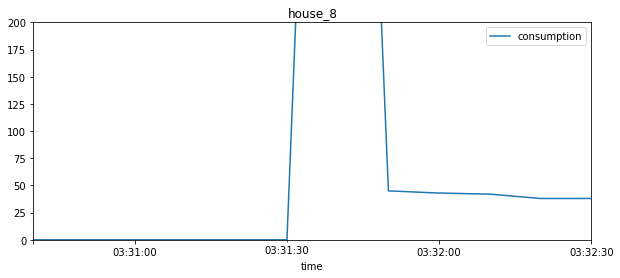

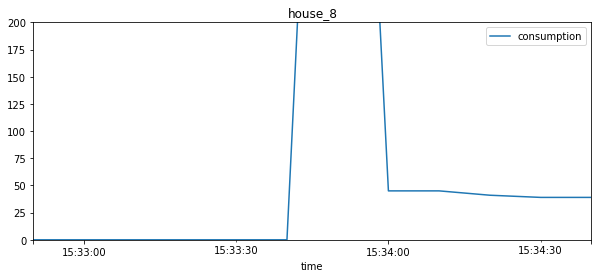

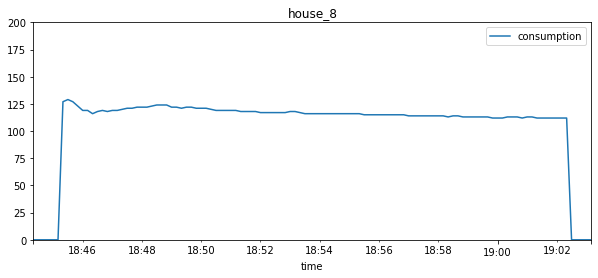

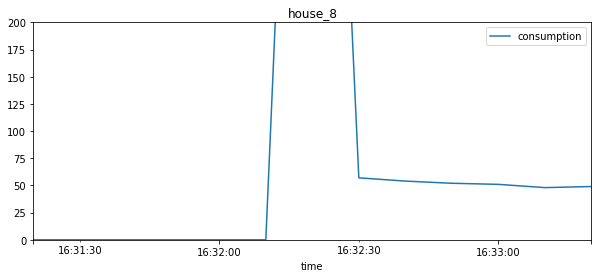

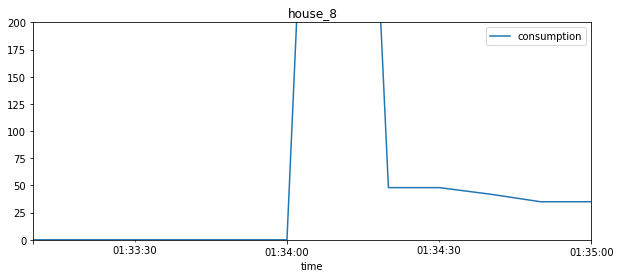

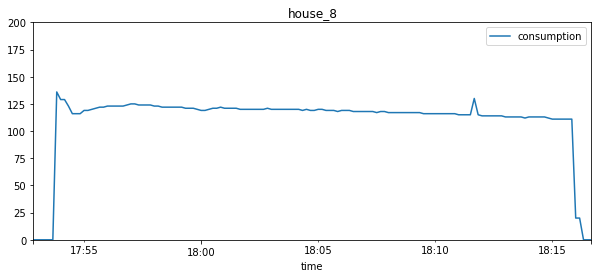

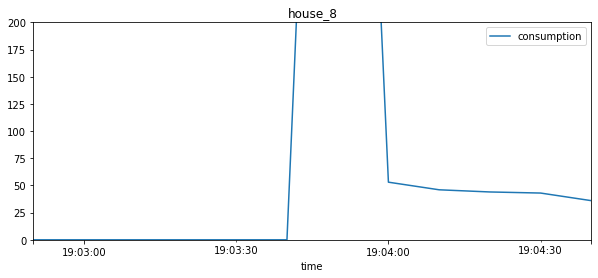

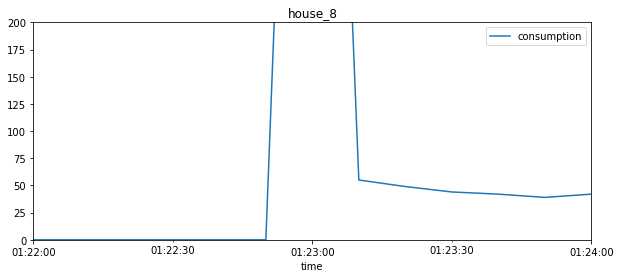

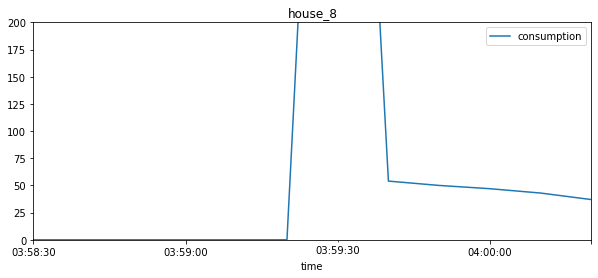

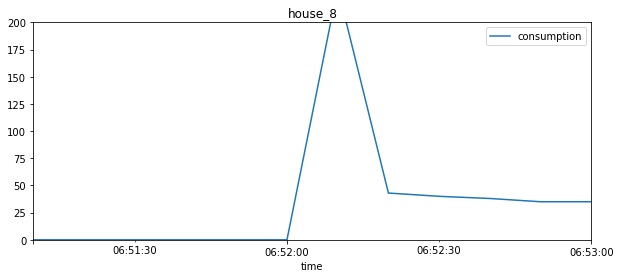

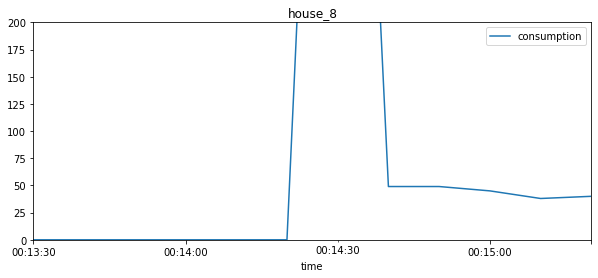

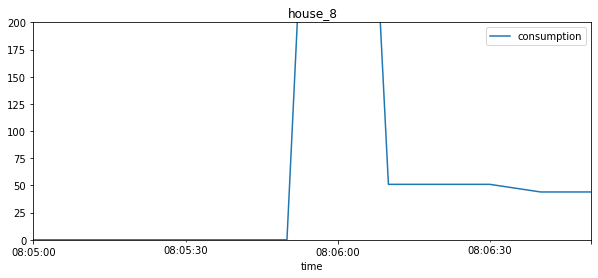

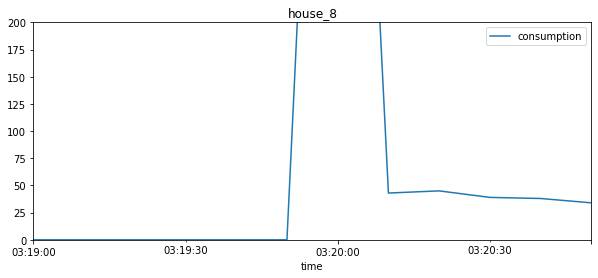

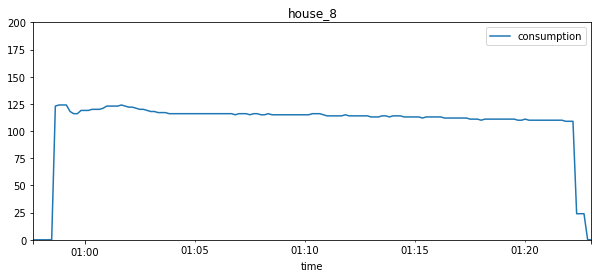

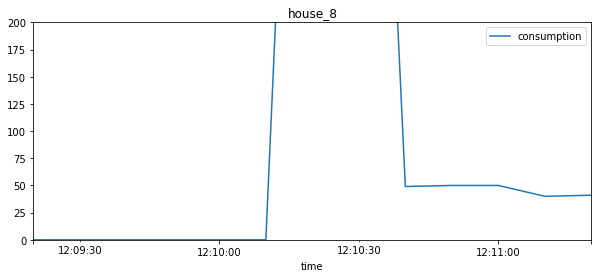

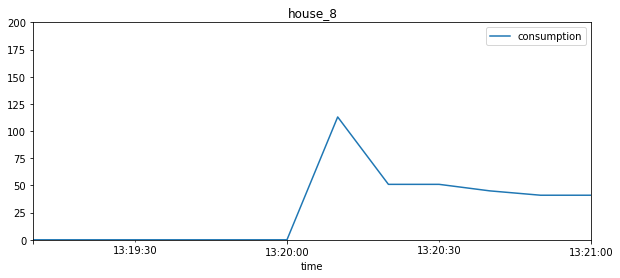

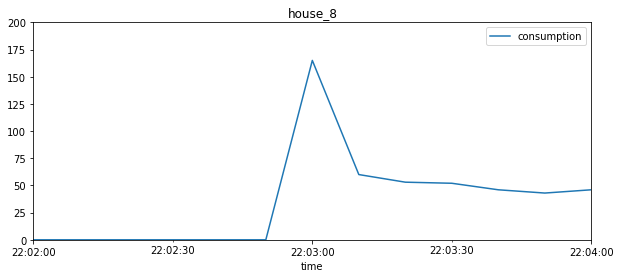

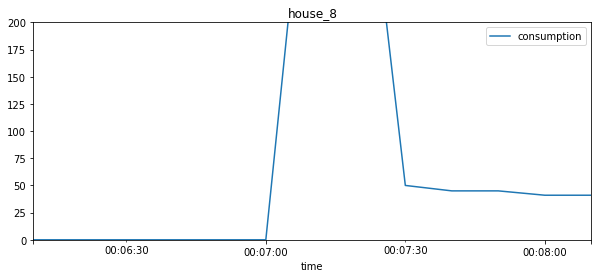

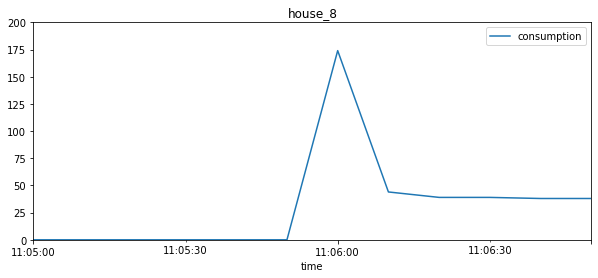

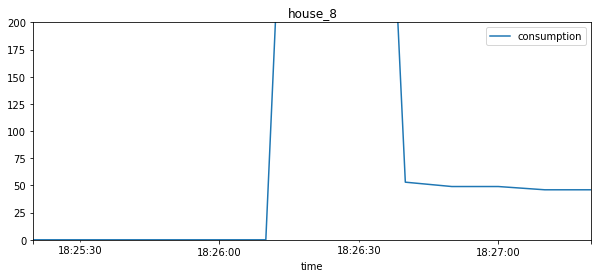

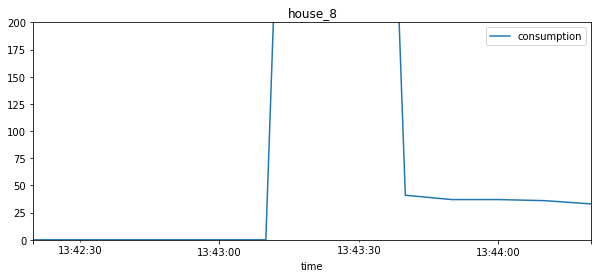

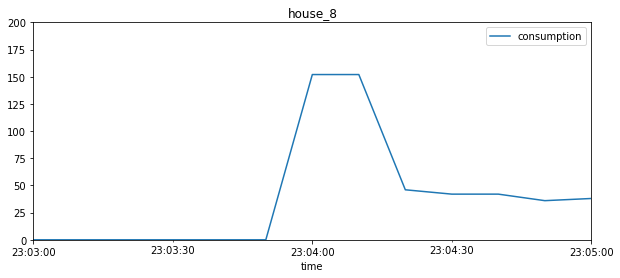

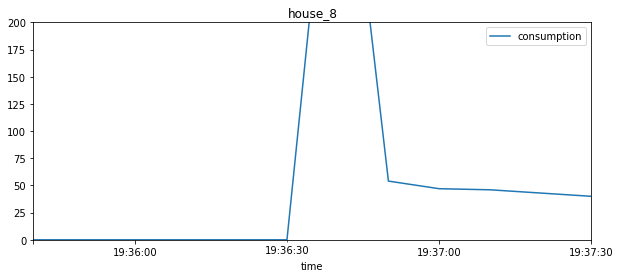

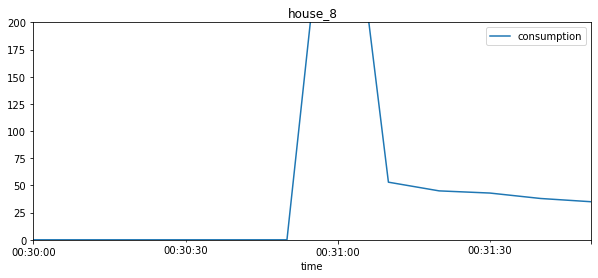

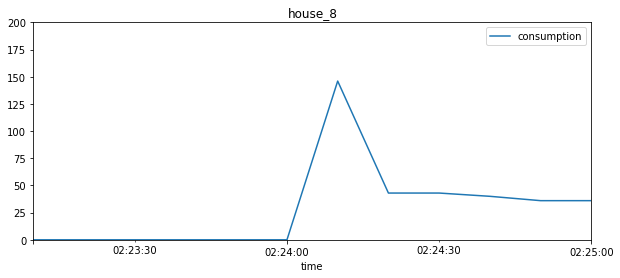

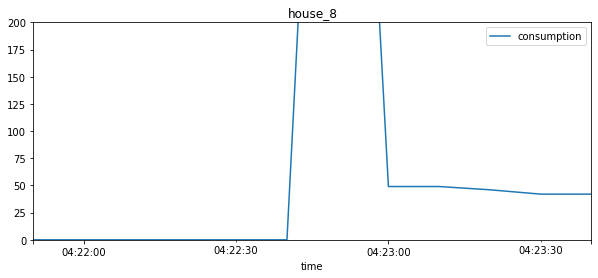

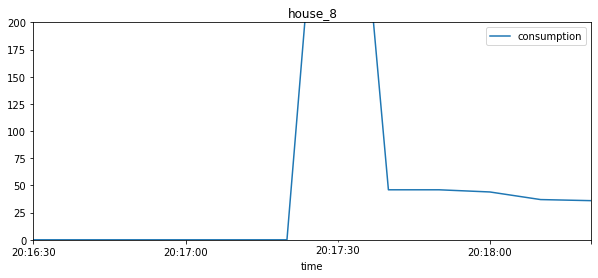

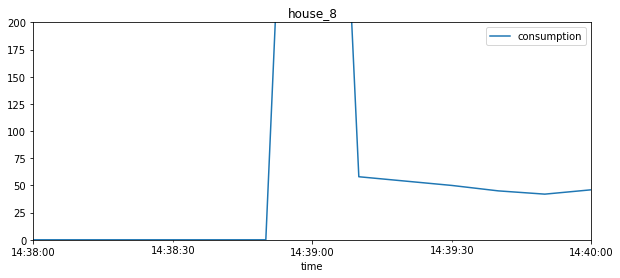

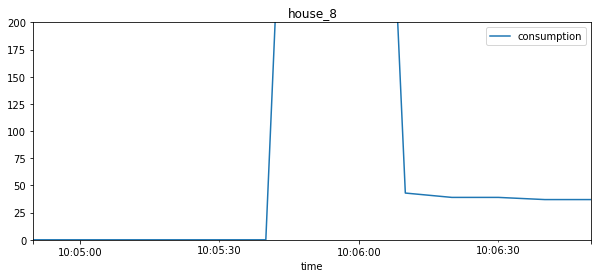

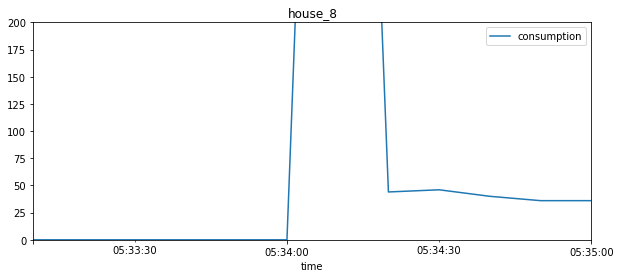

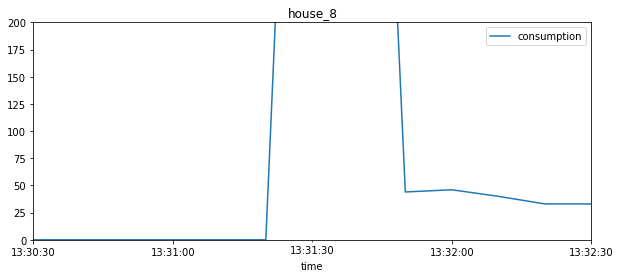

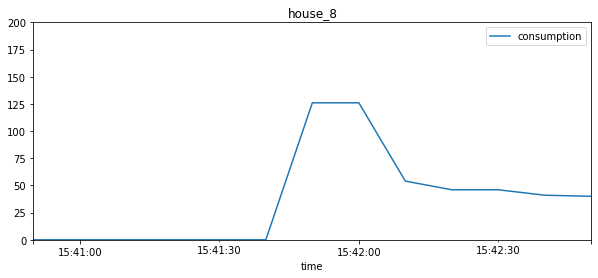

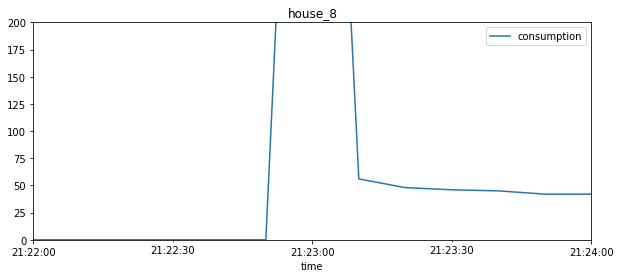

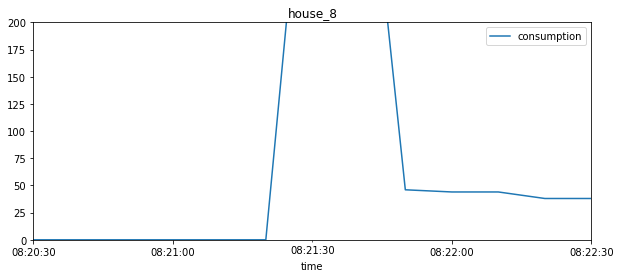

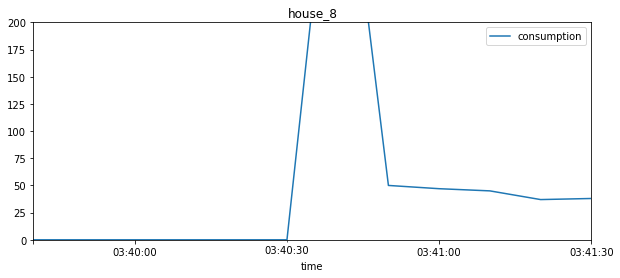

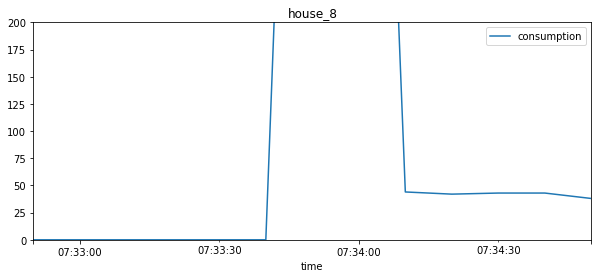

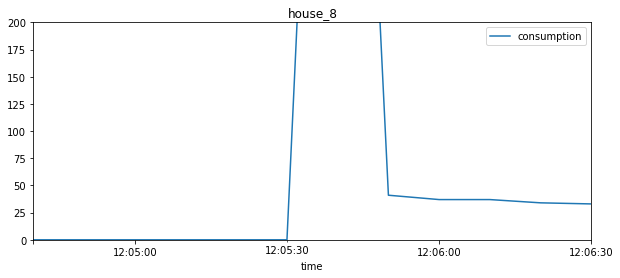

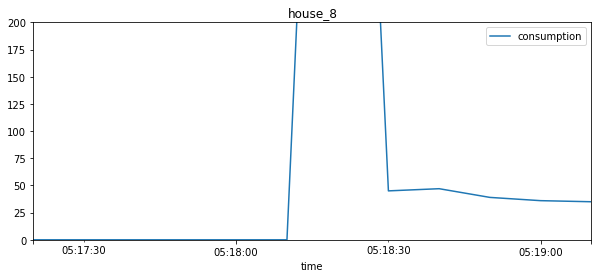

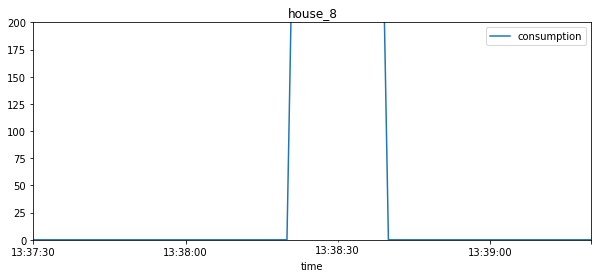

In [23]:
house=8
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning-6:end+6].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


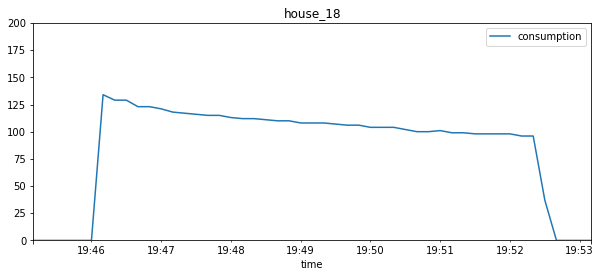

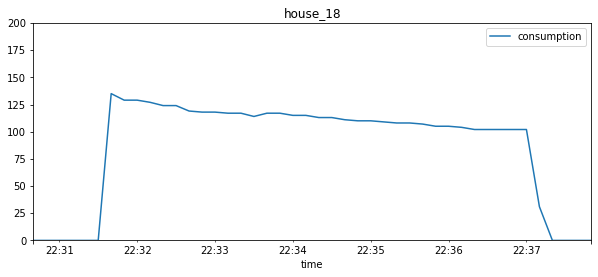

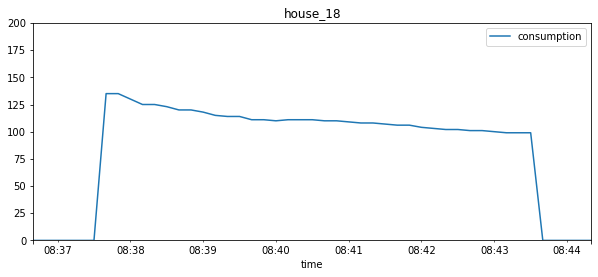

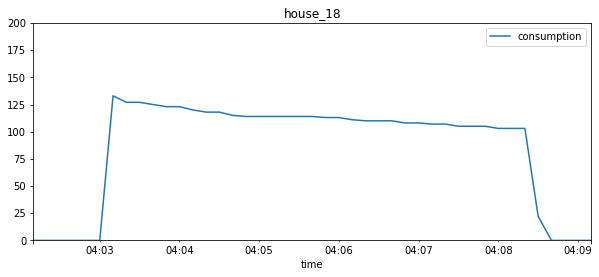

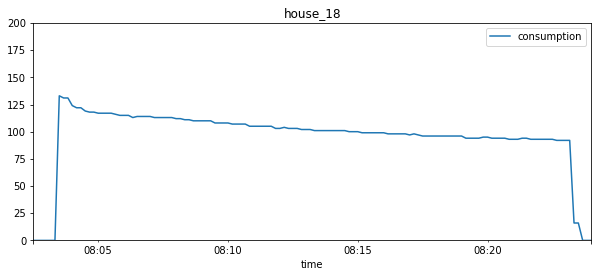

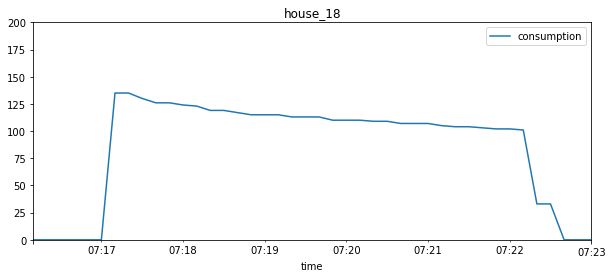

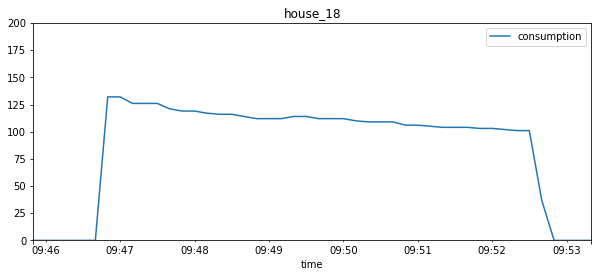

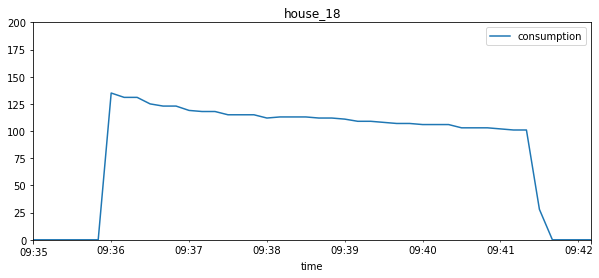

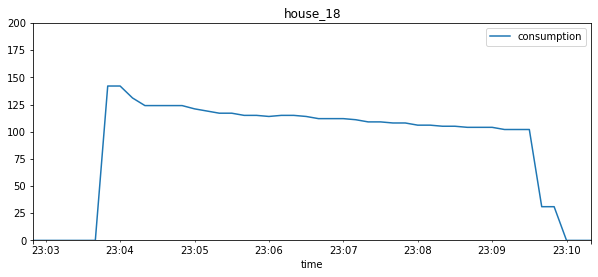

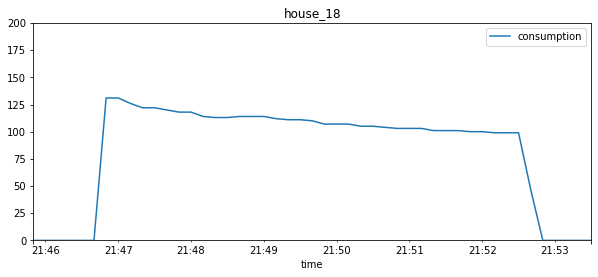

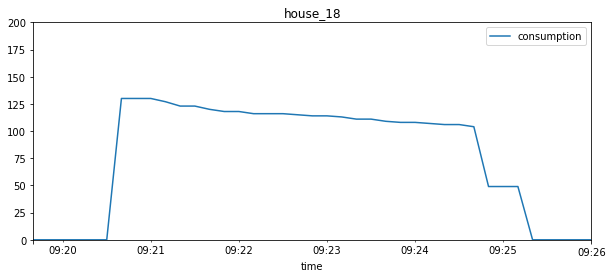

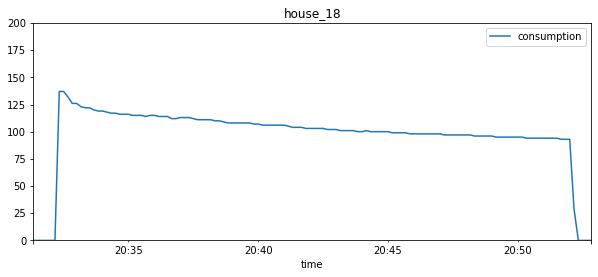

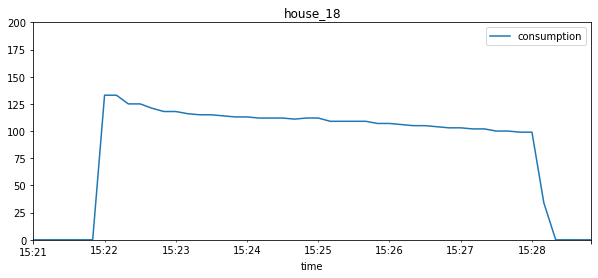

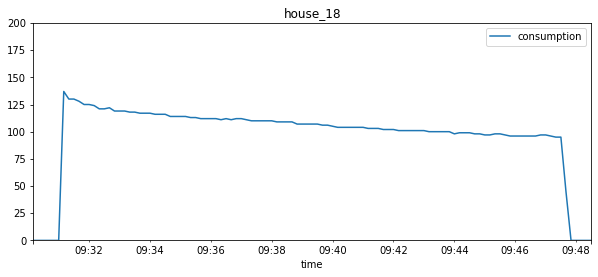

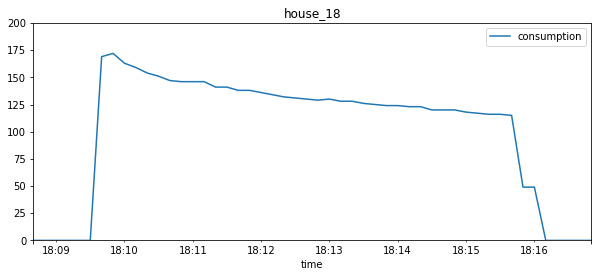

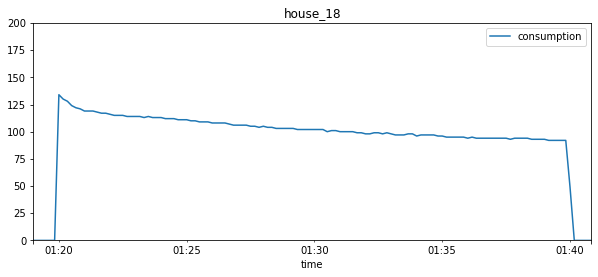

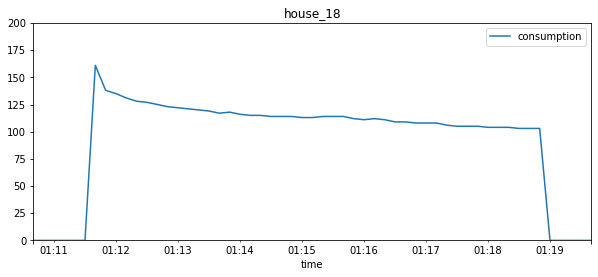

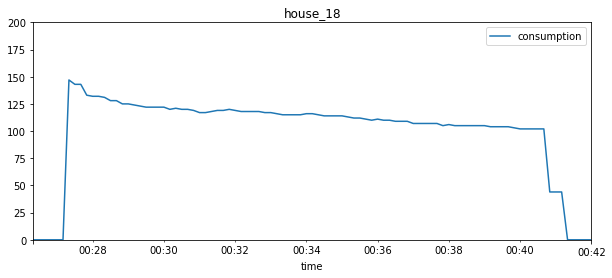

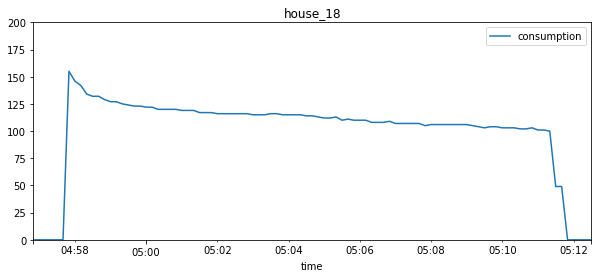

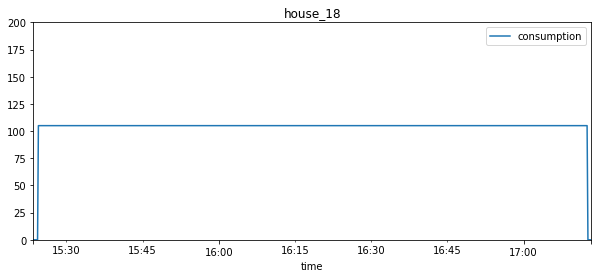

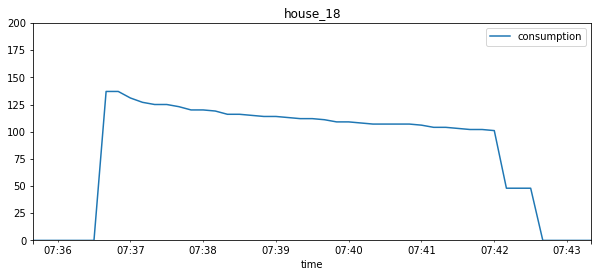

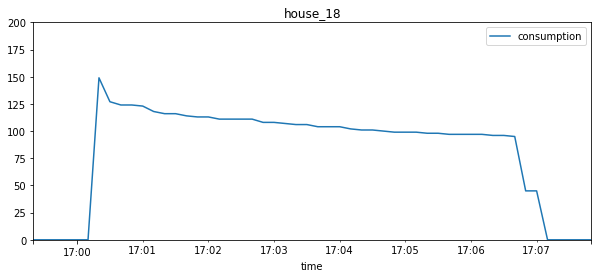

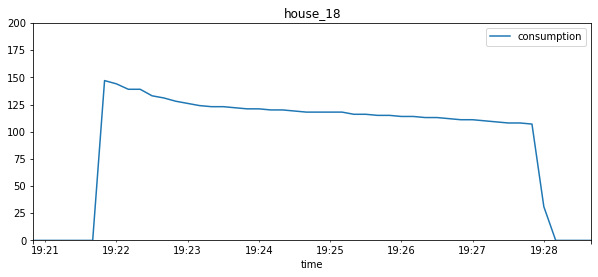

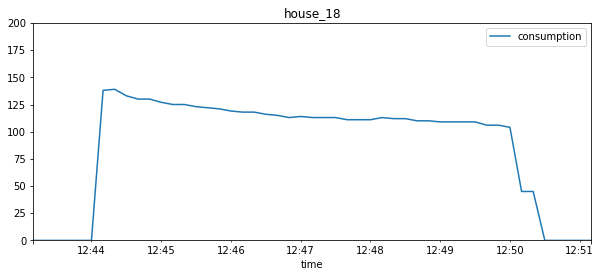

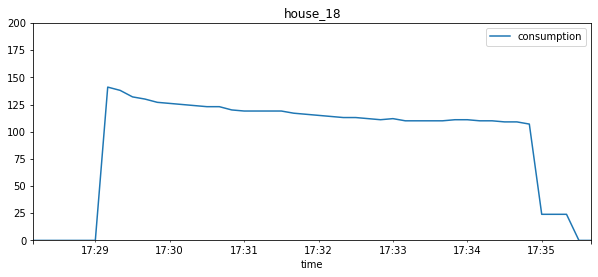

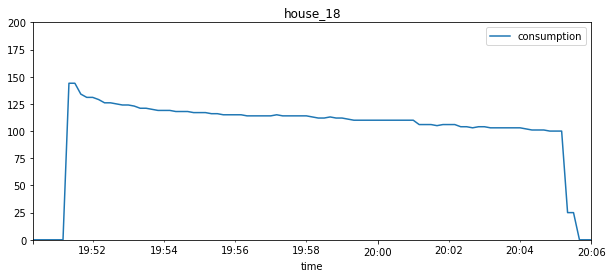

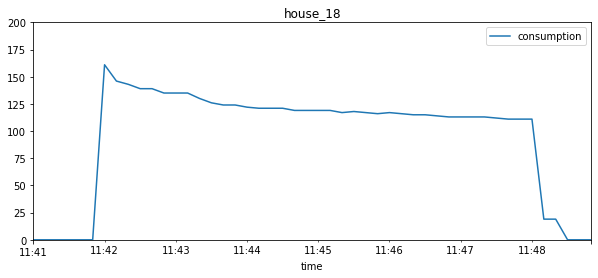

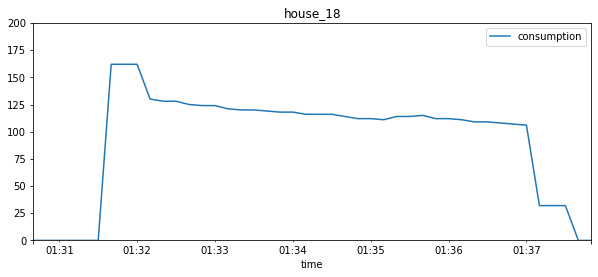

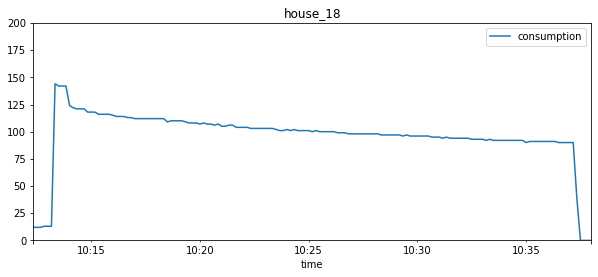

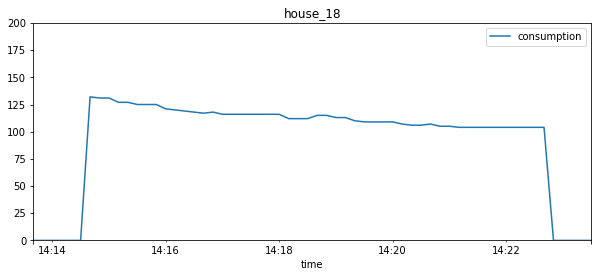

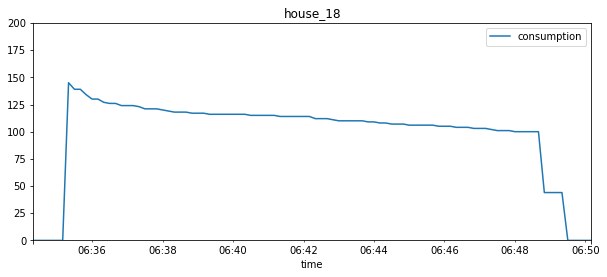

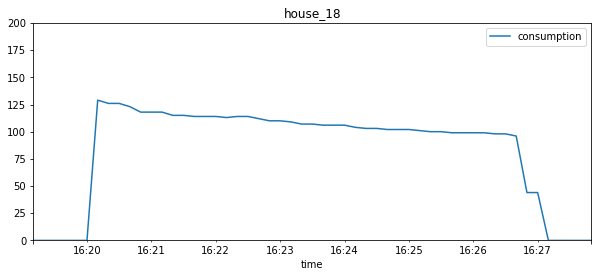

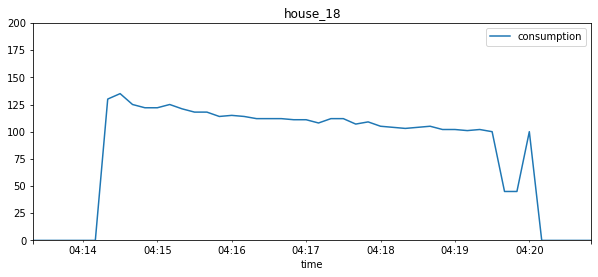

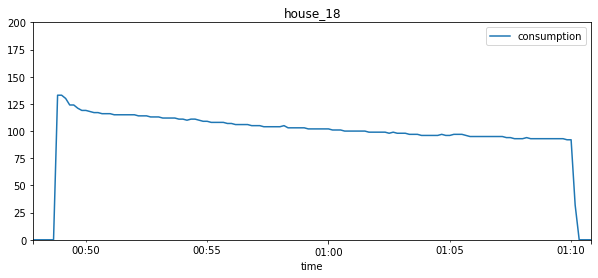

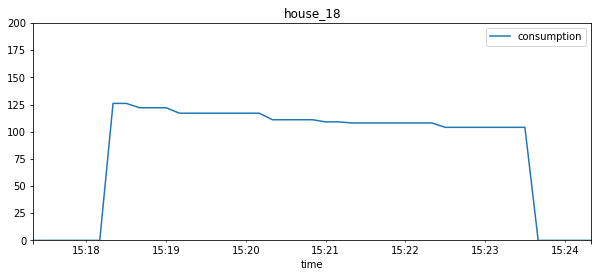

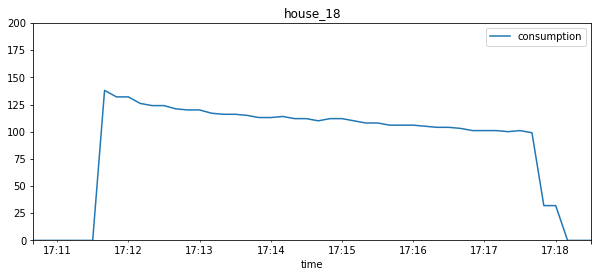

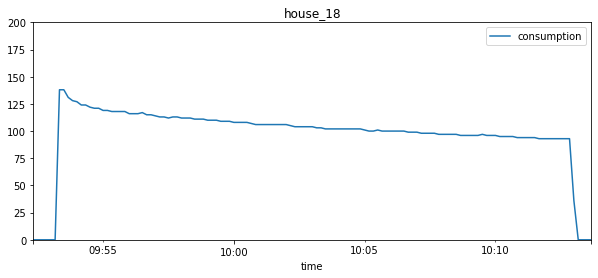

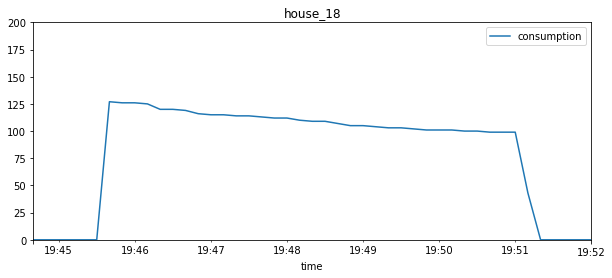

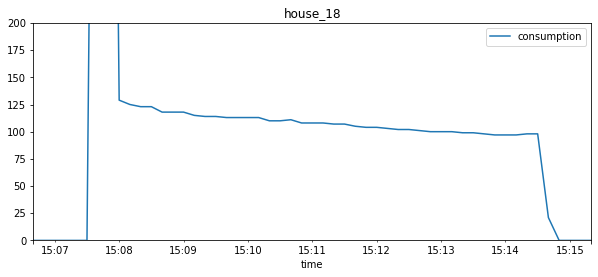

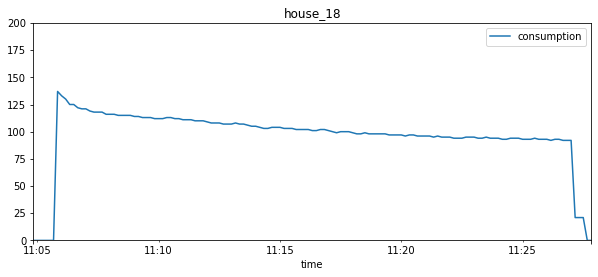

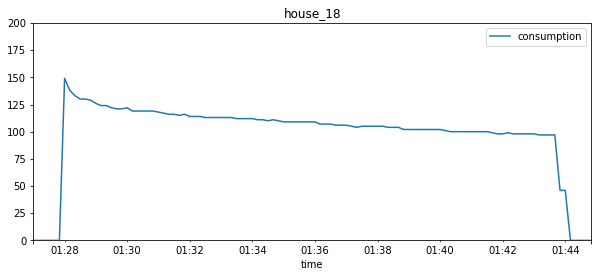

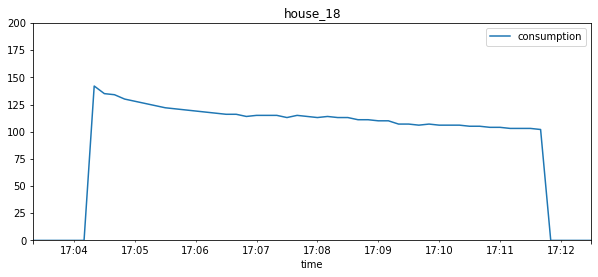

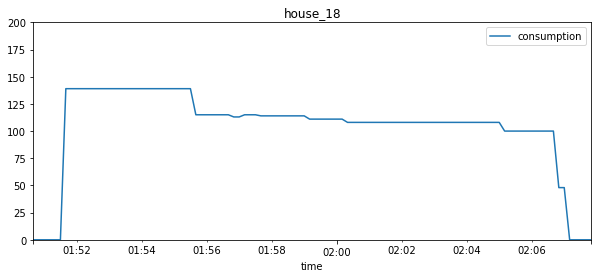

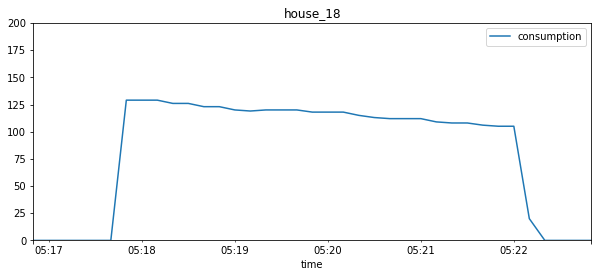

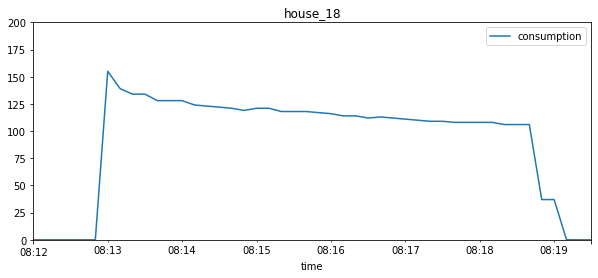

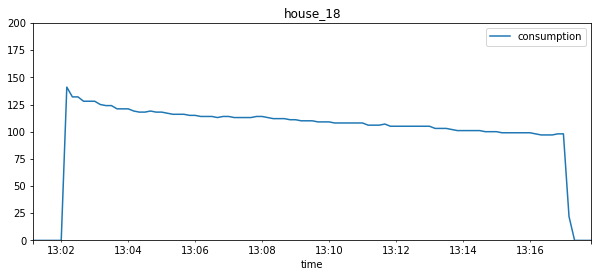

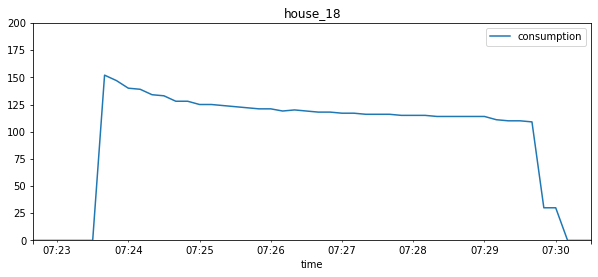

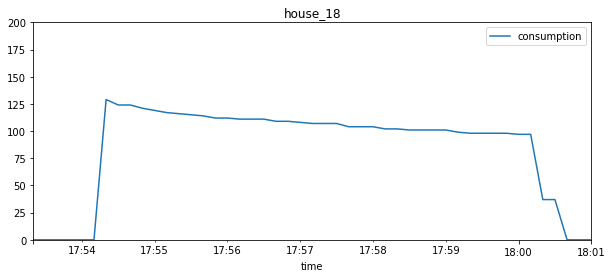

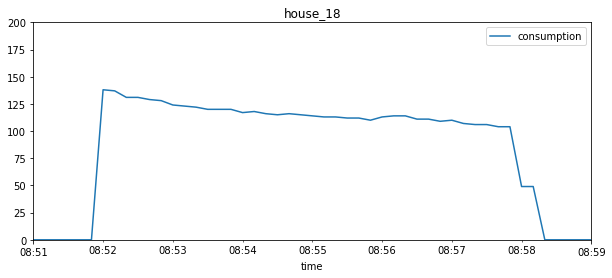

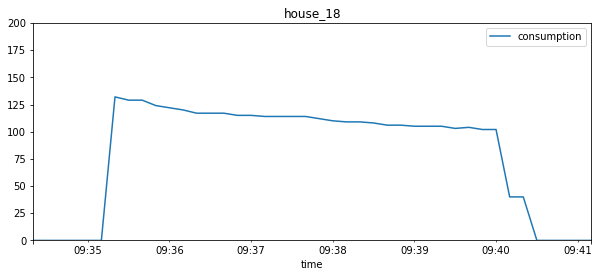

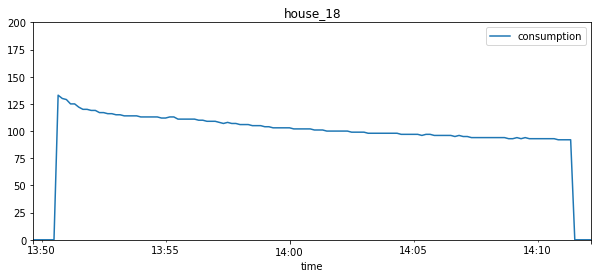

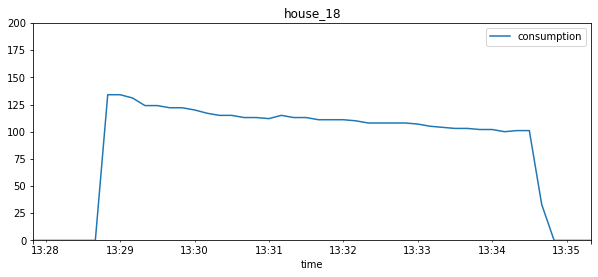

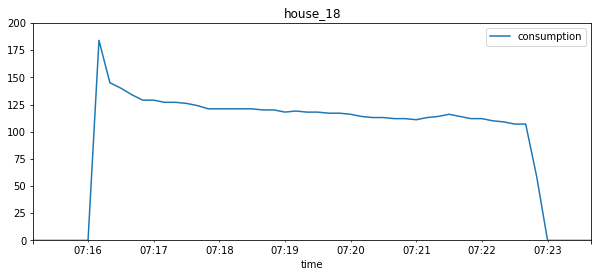

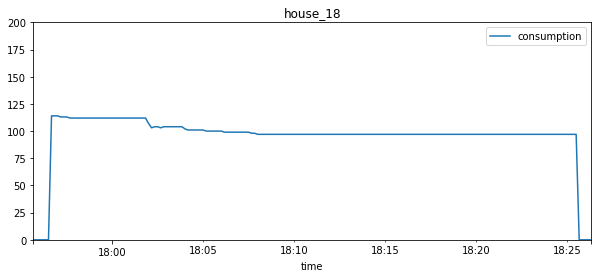

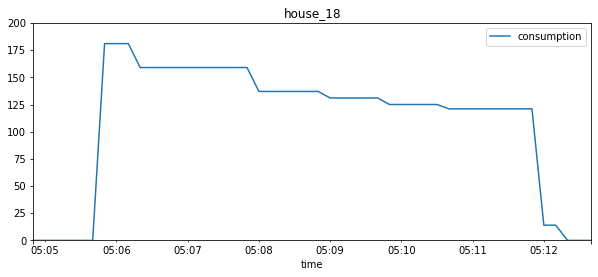

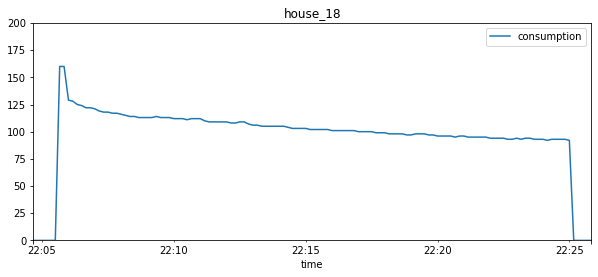

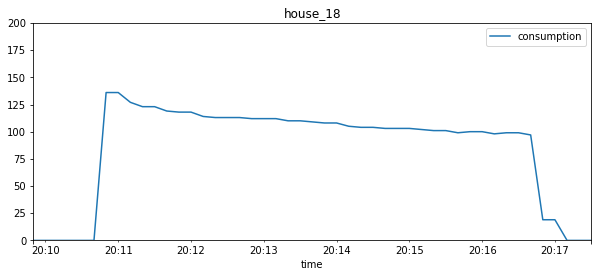

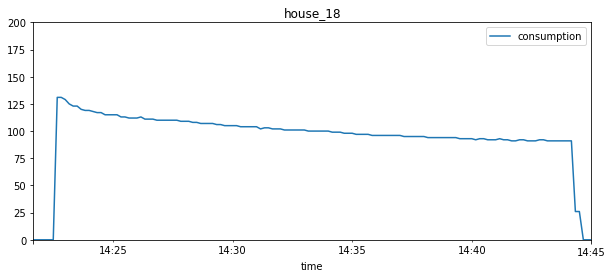

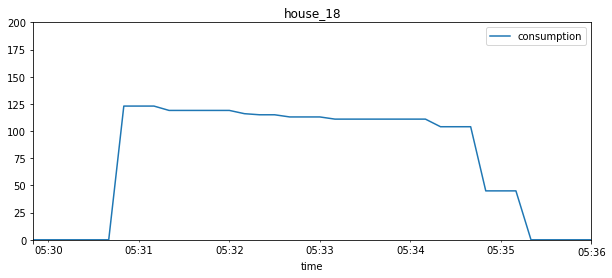

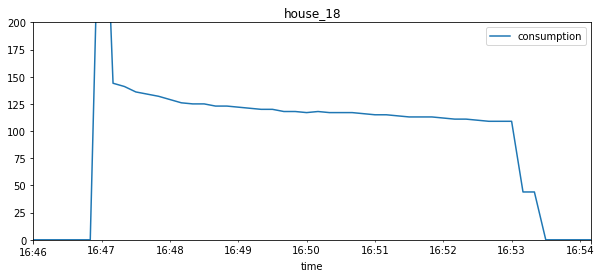

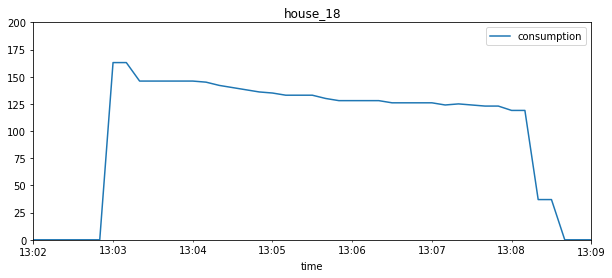

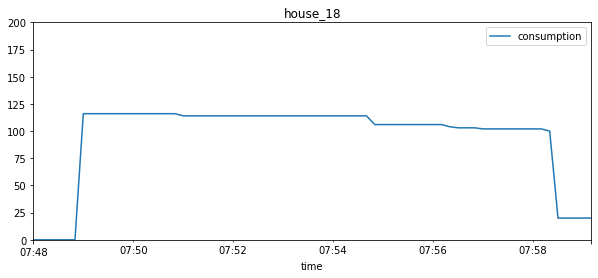

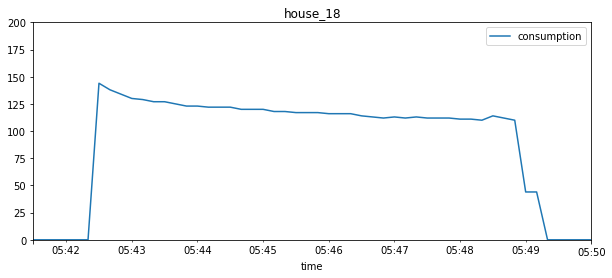

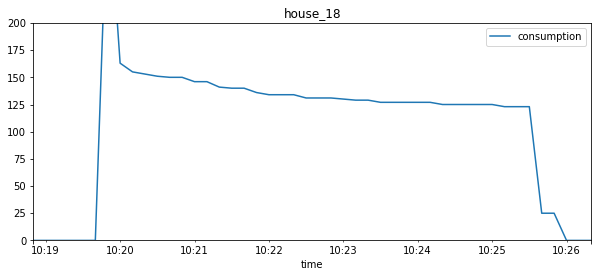

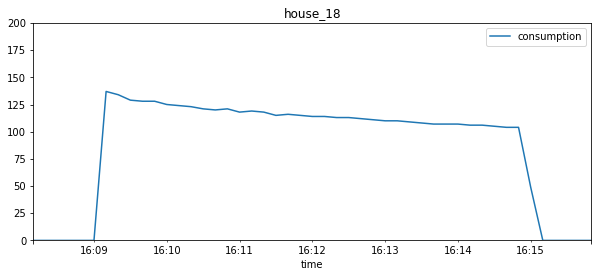

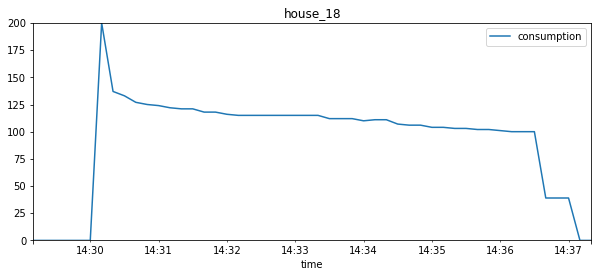

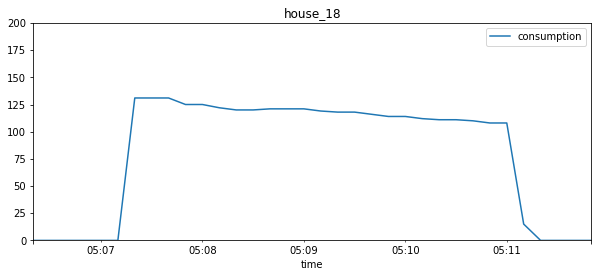

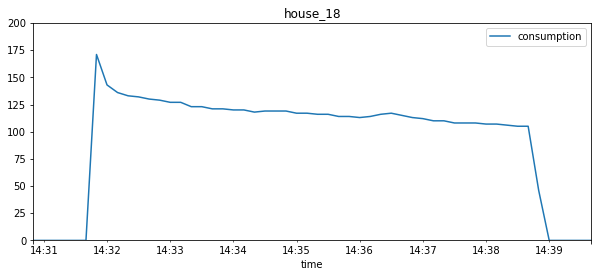

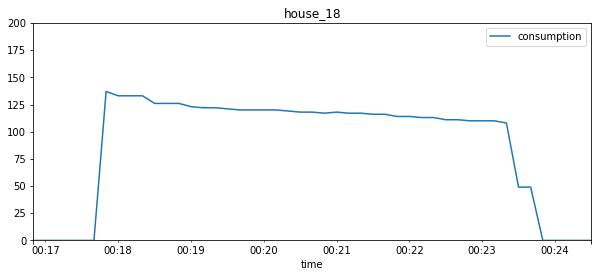

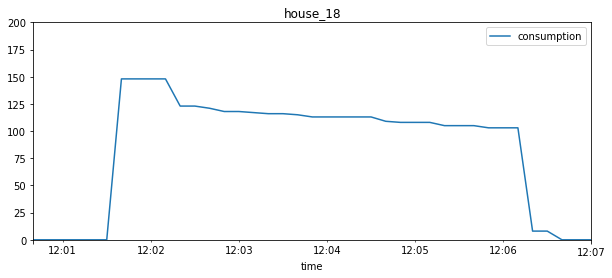

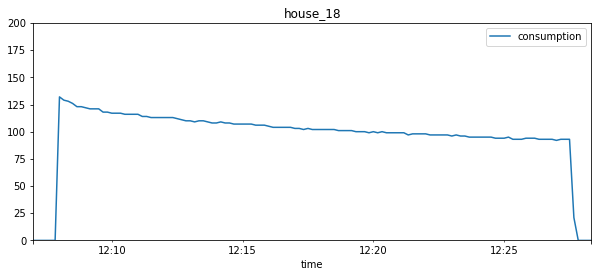

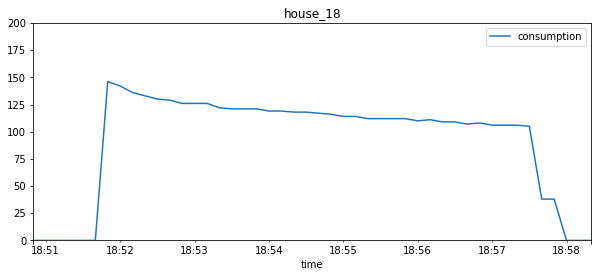

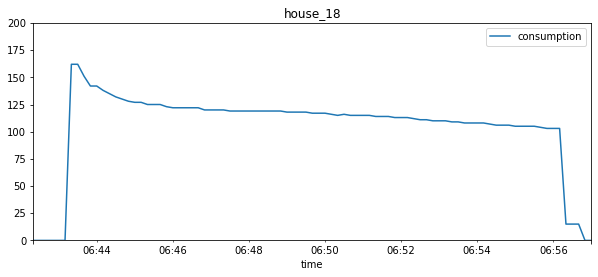

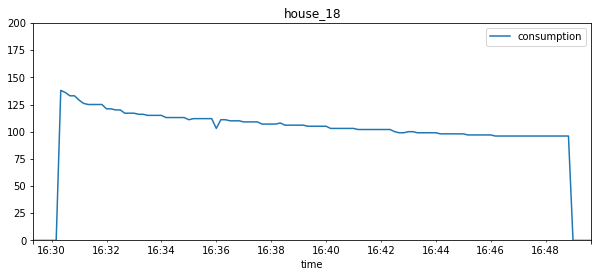

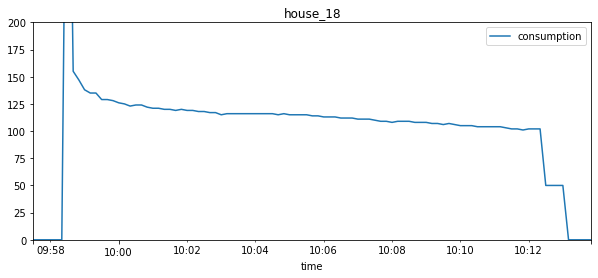

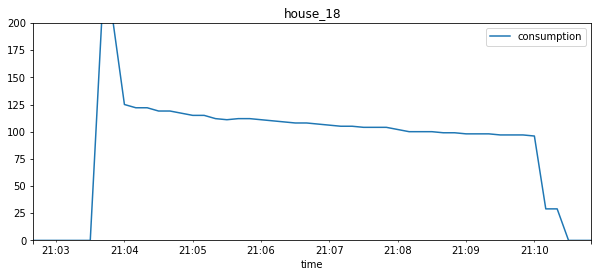

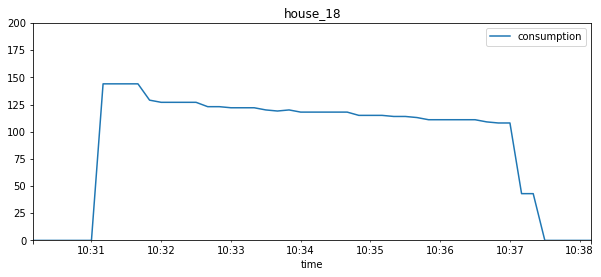

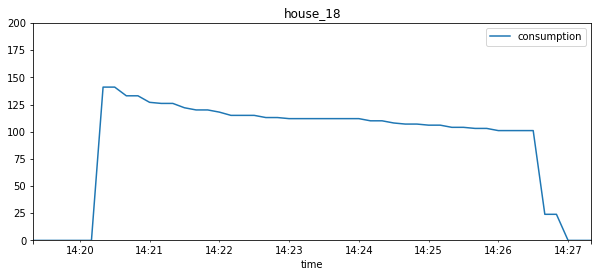

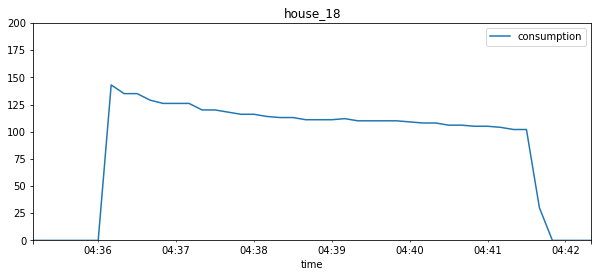

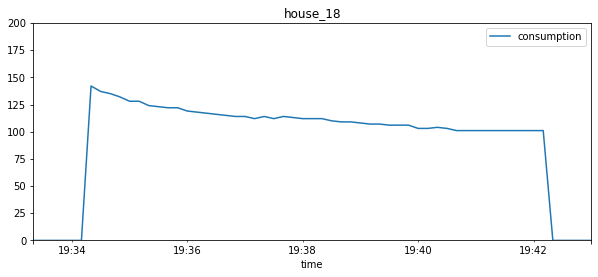

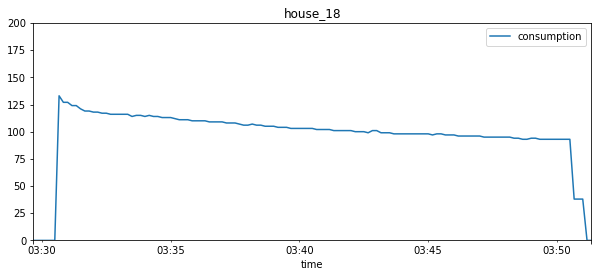

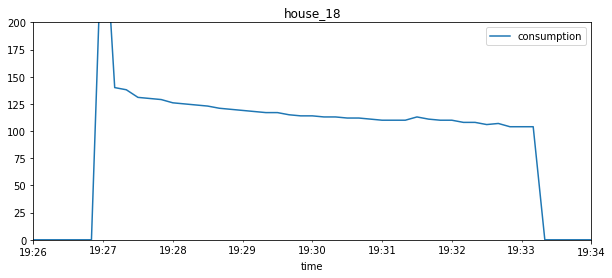

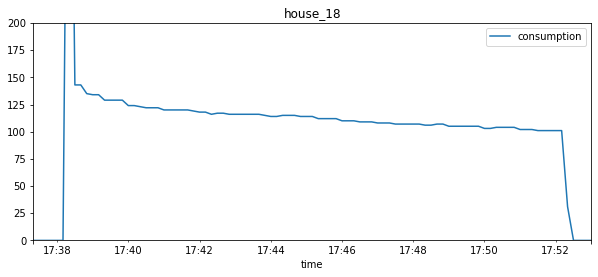

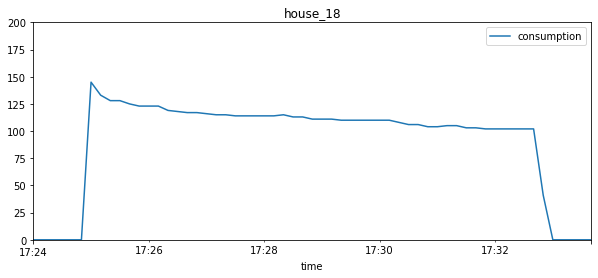

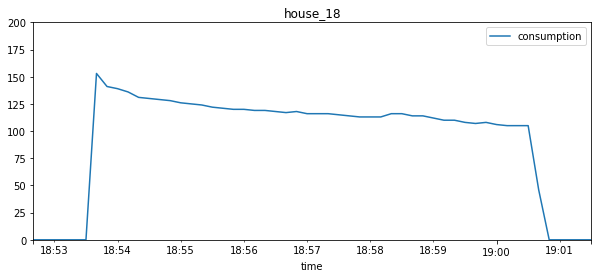

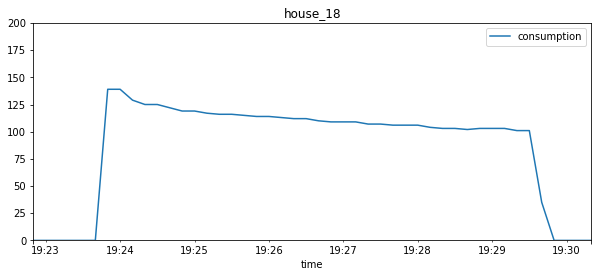

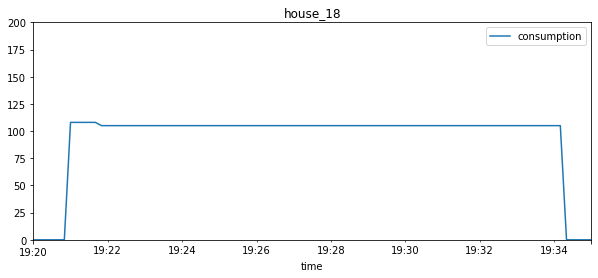

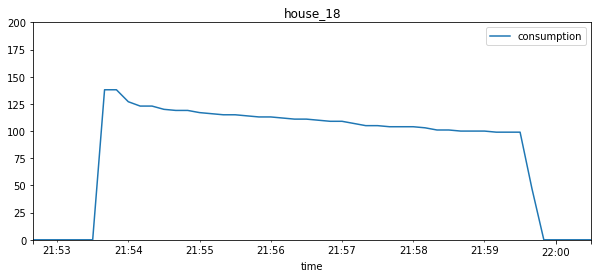

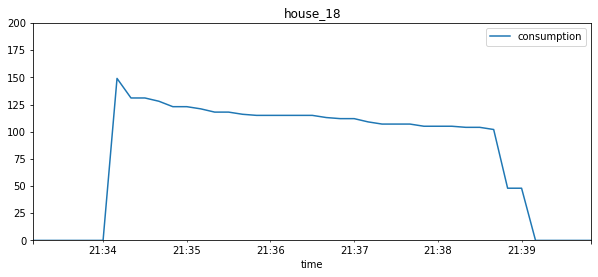

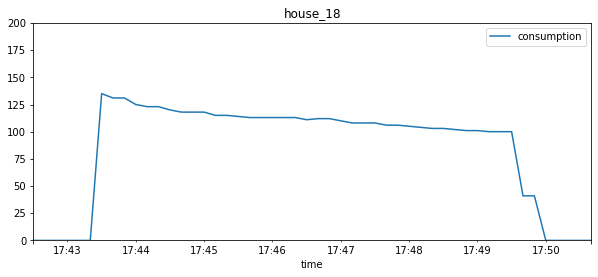

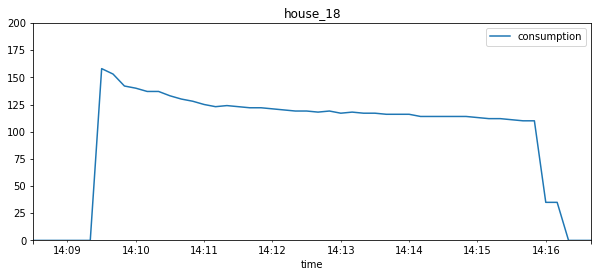

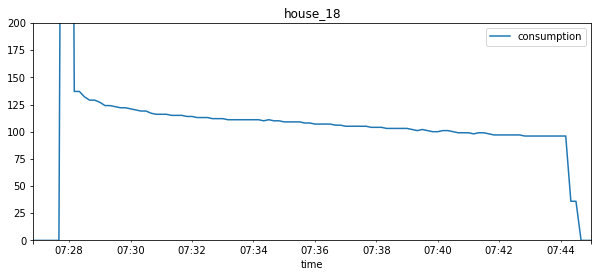

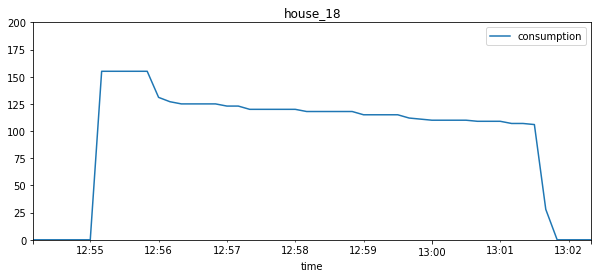

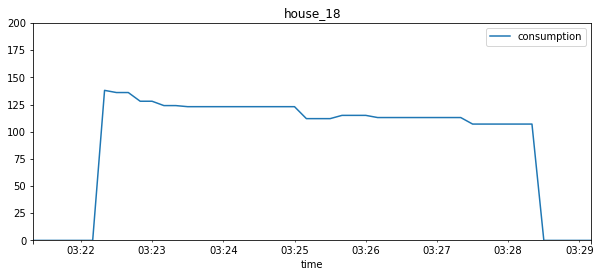

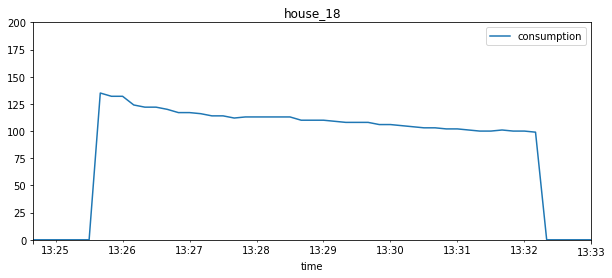

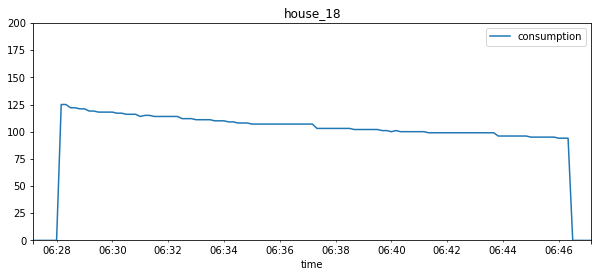

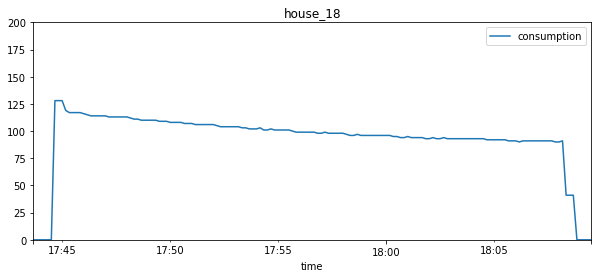

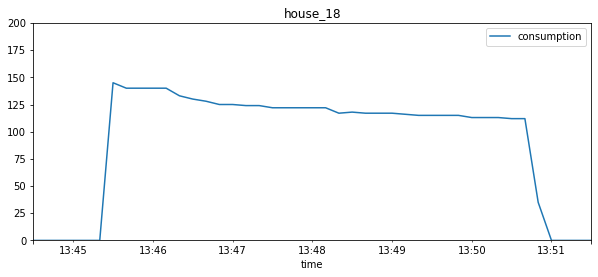

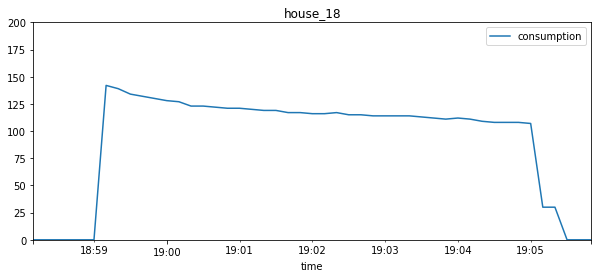

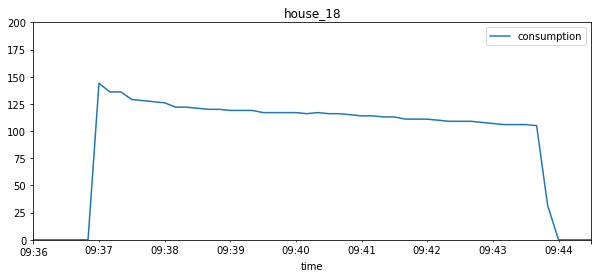

In [13]:
house=18
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning-6:end+6].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


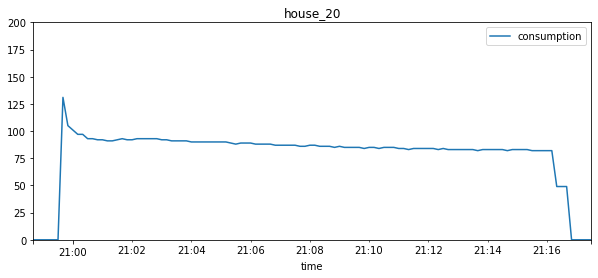

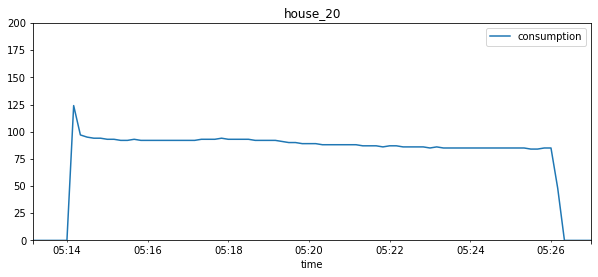

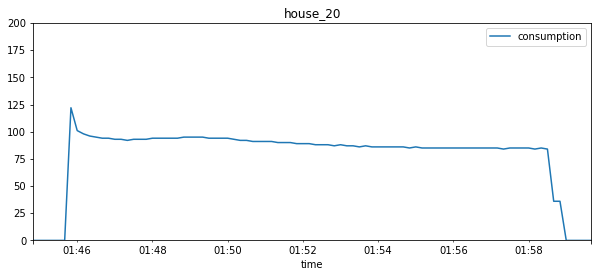

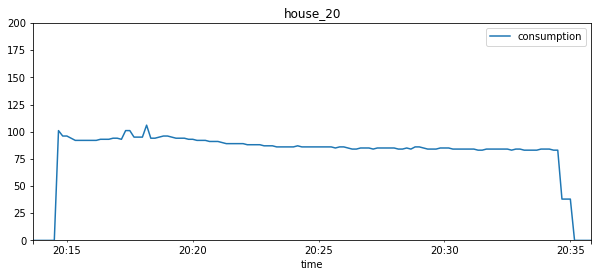

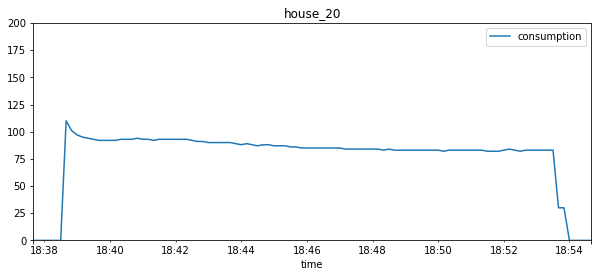

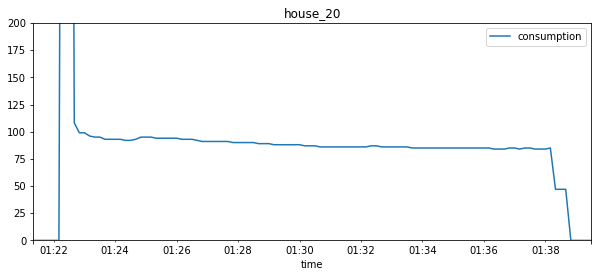

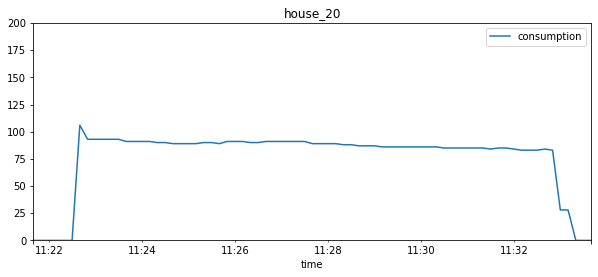

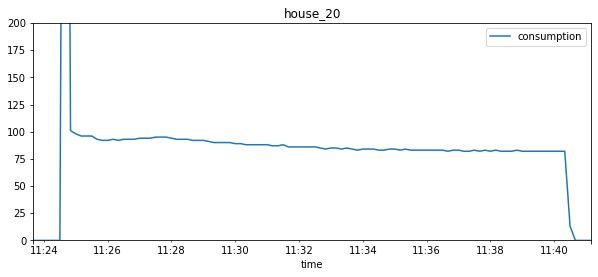

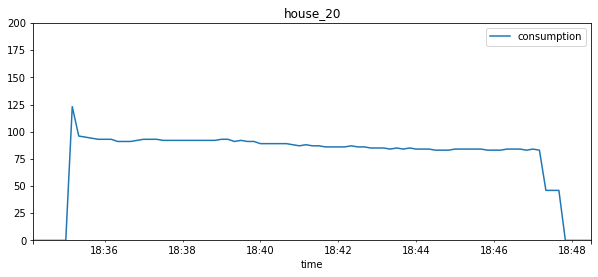

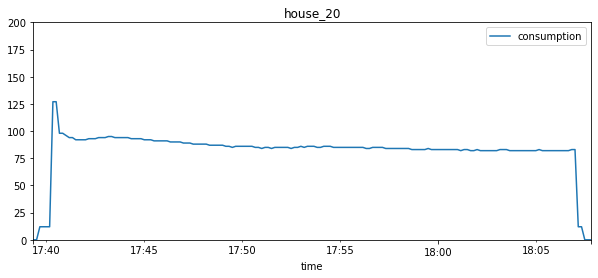

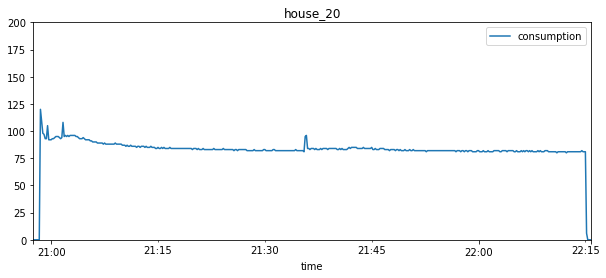

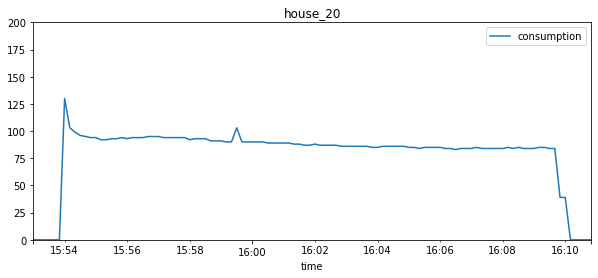

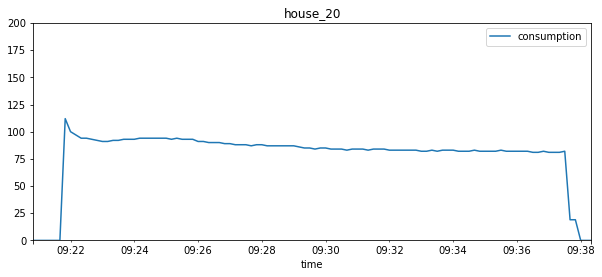

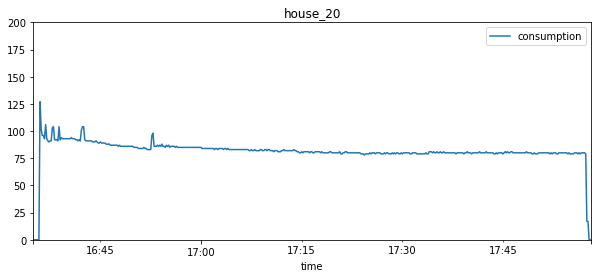

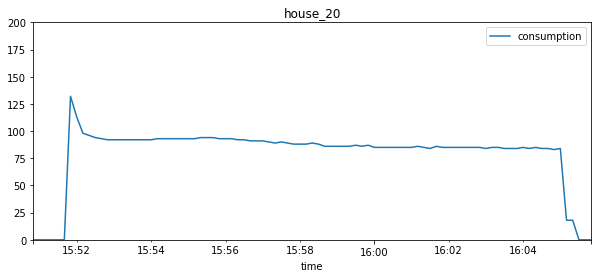

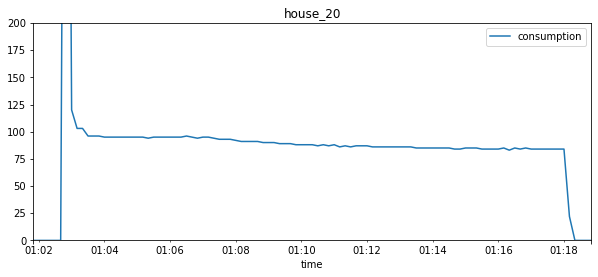

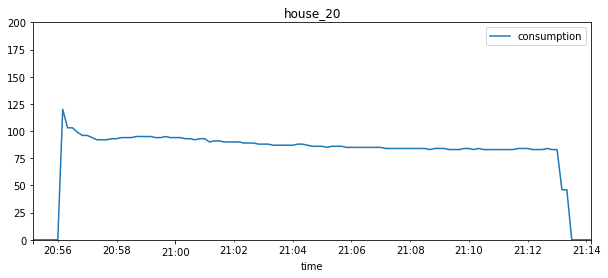

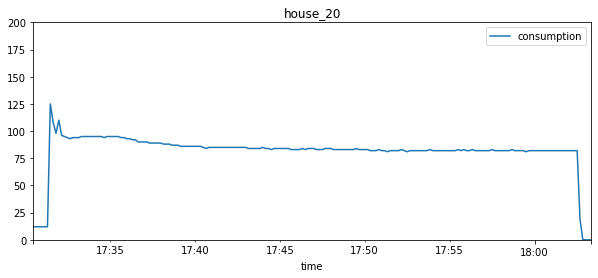

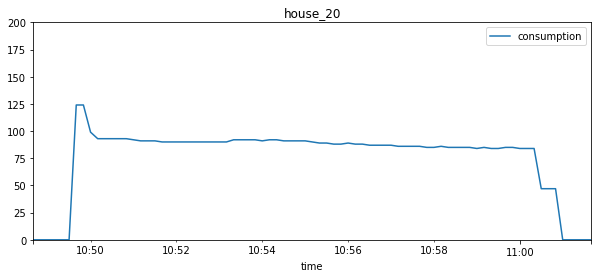

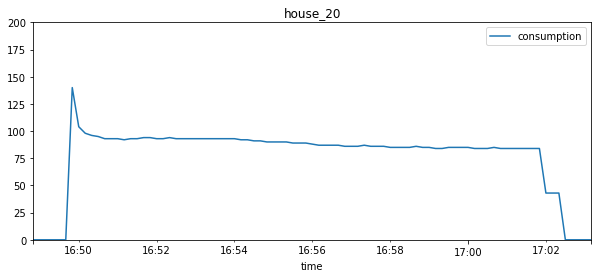

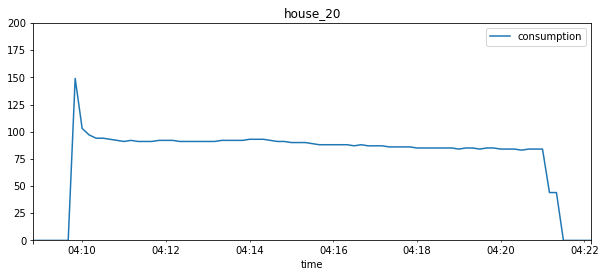

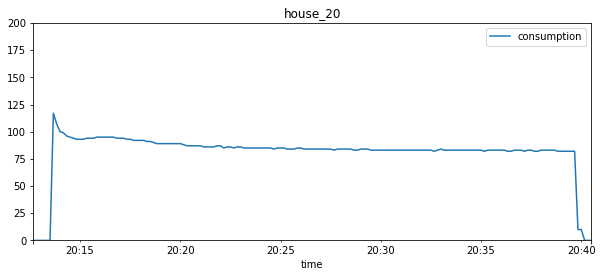

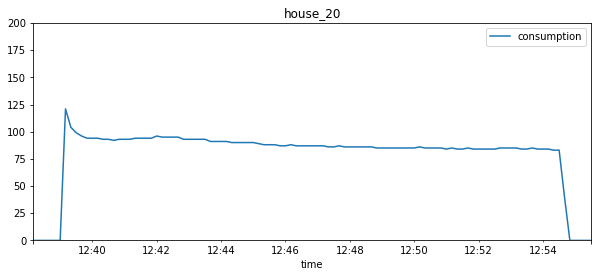

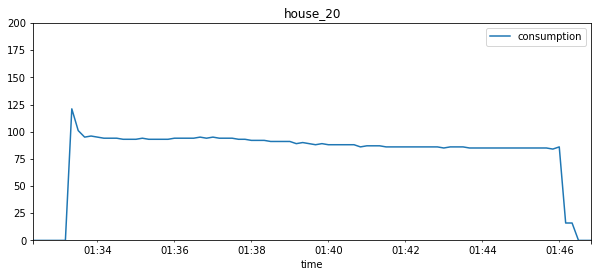

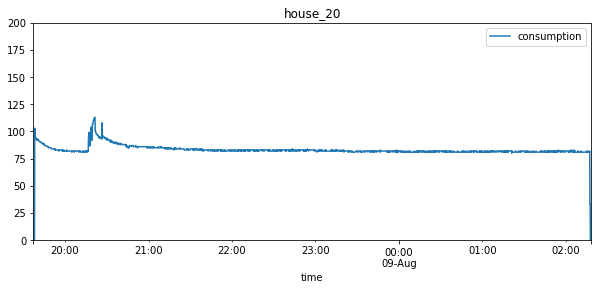

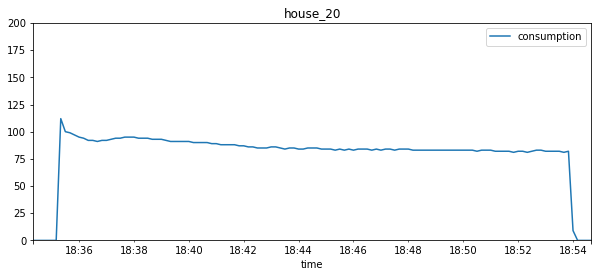

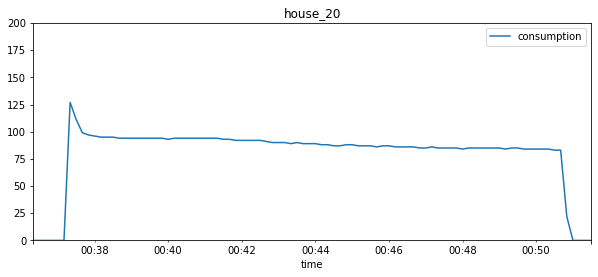

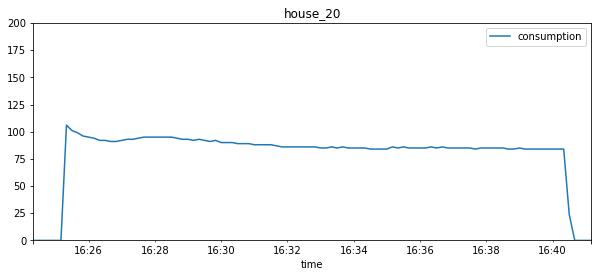

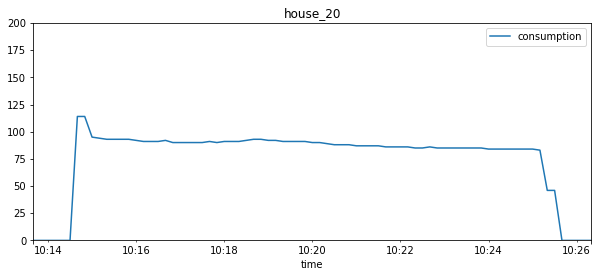

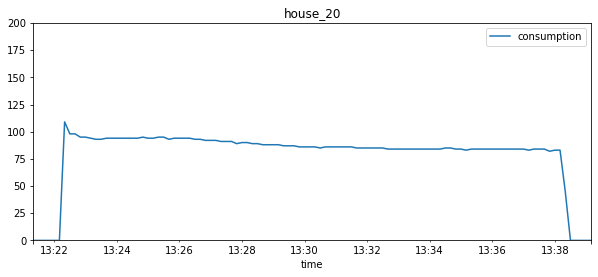

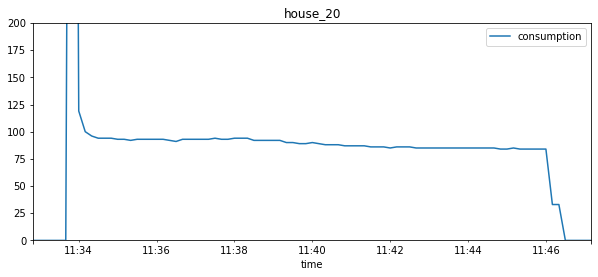

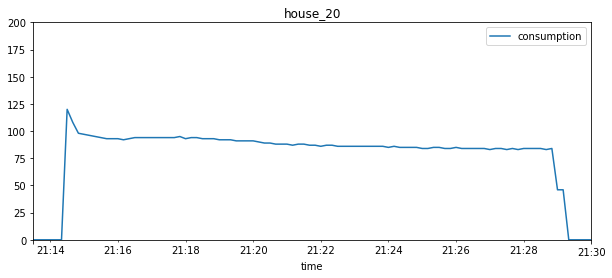

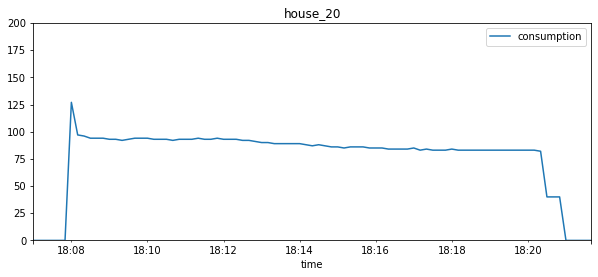

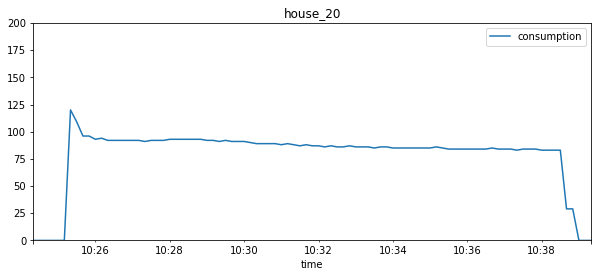

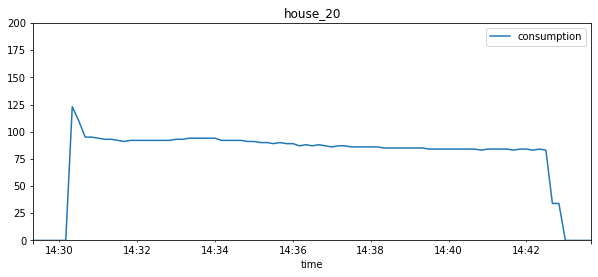

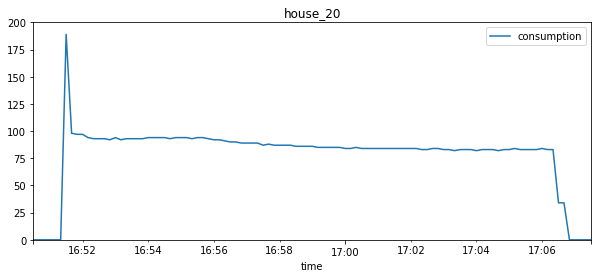

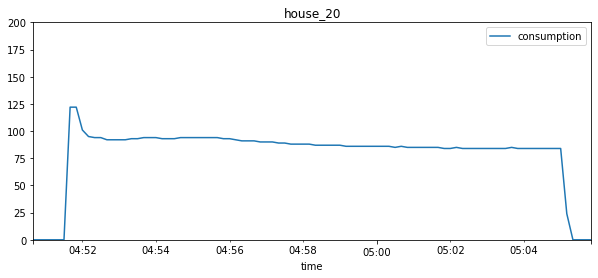

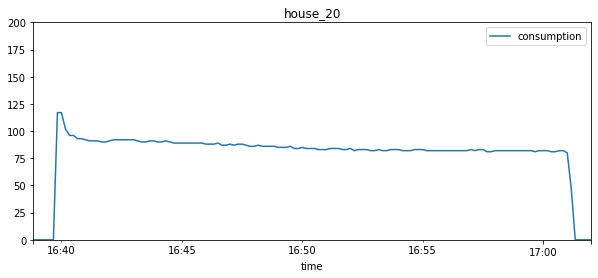

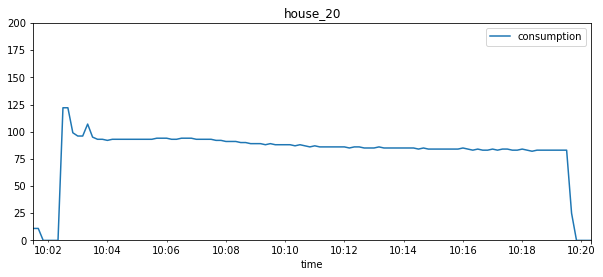

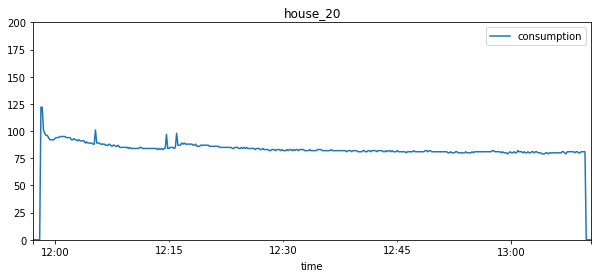

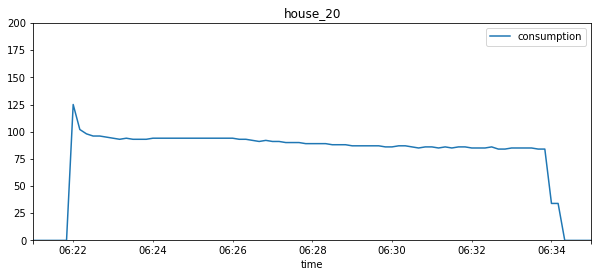

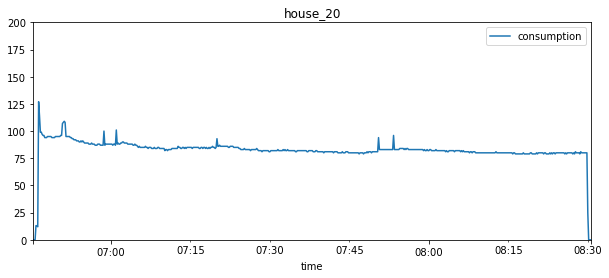

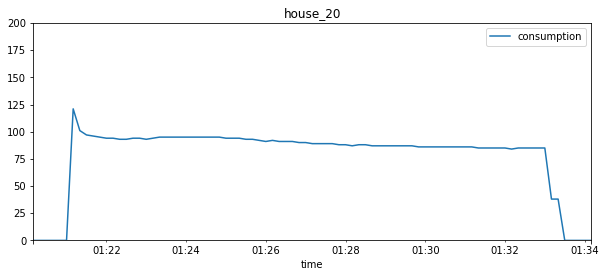

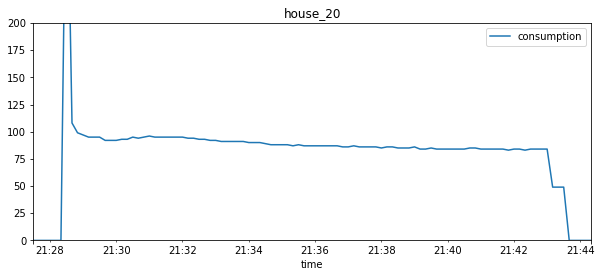

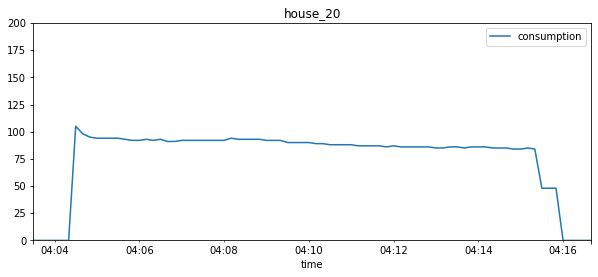

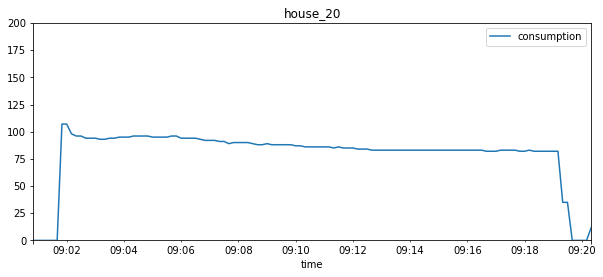

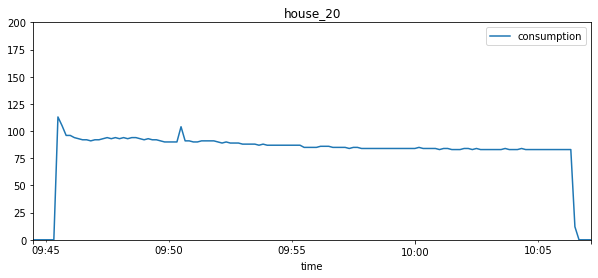

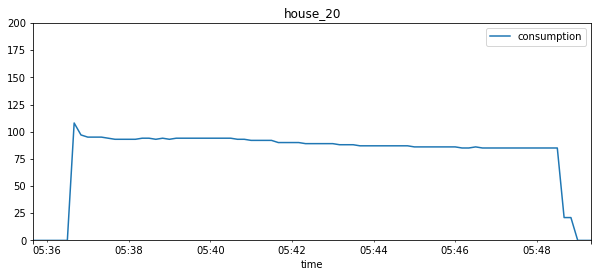

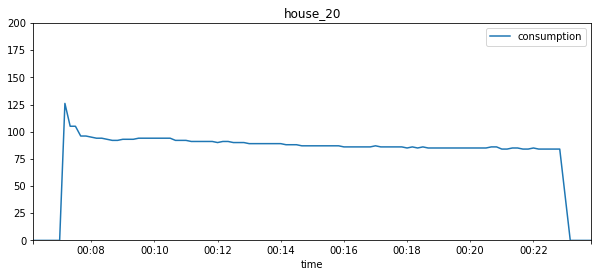

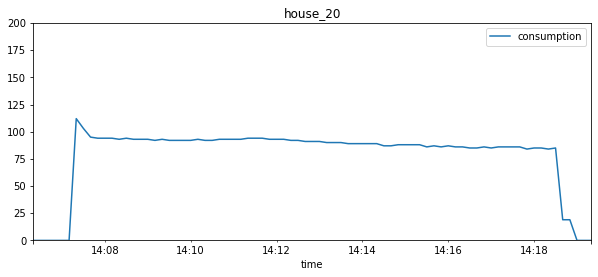

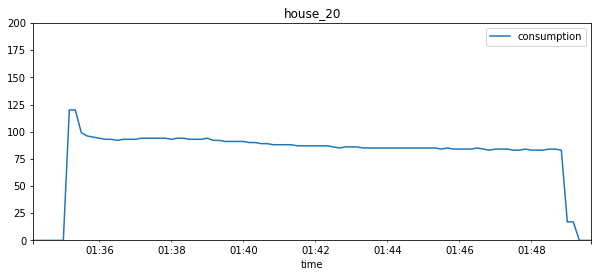

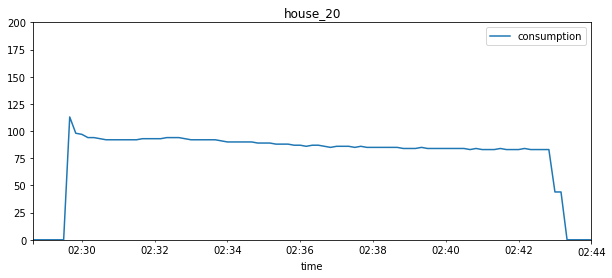

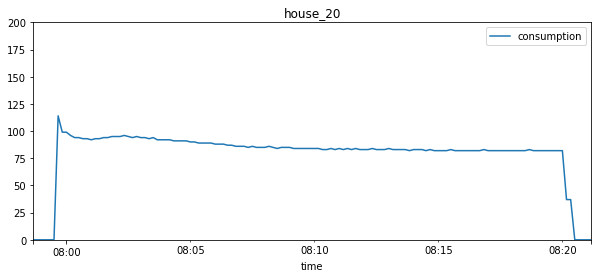

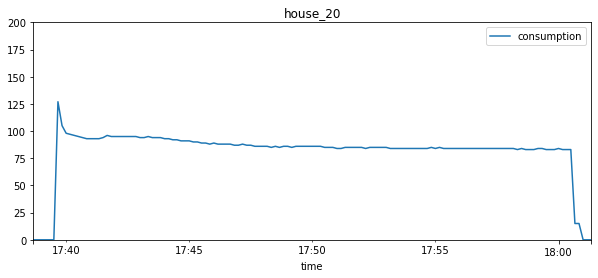

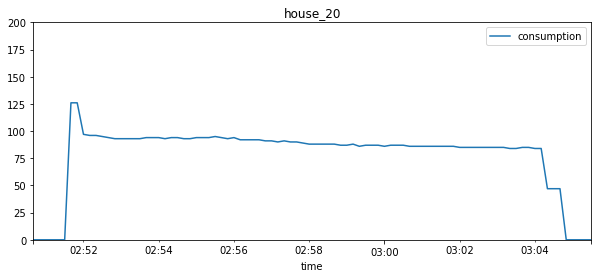

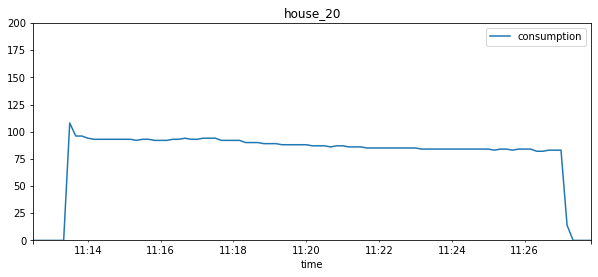

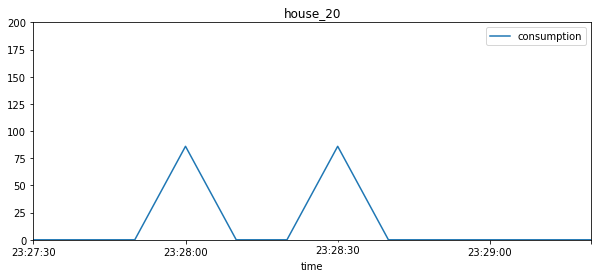

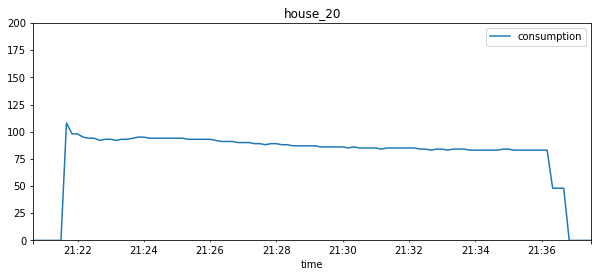

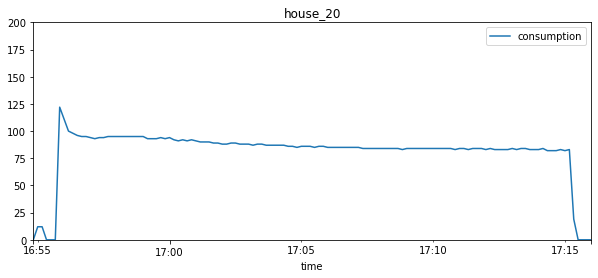

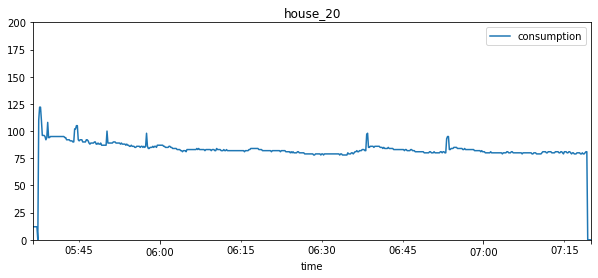

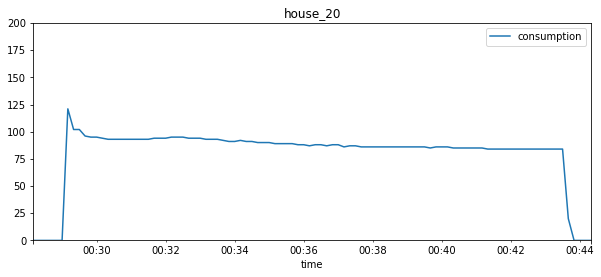

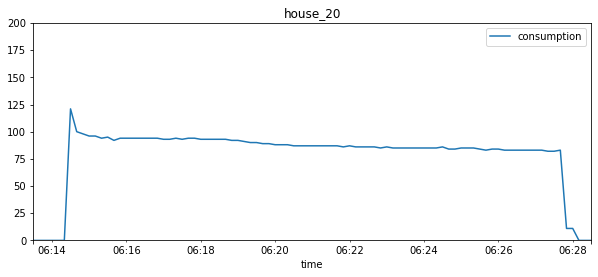

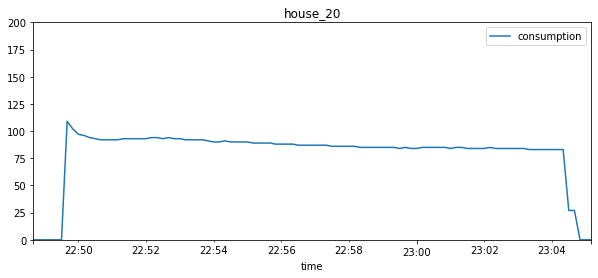

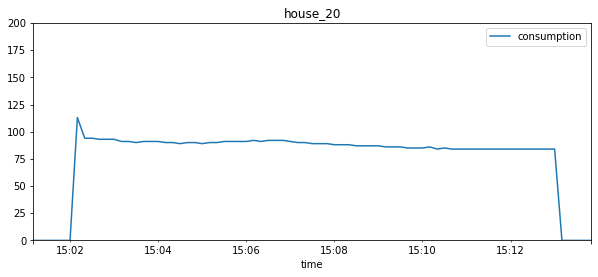

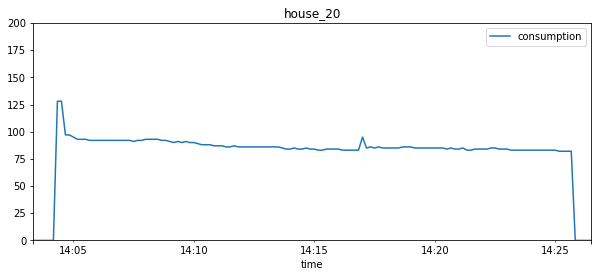

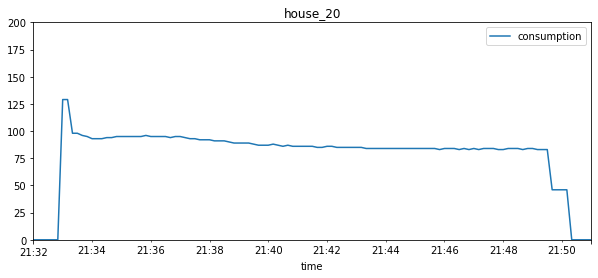

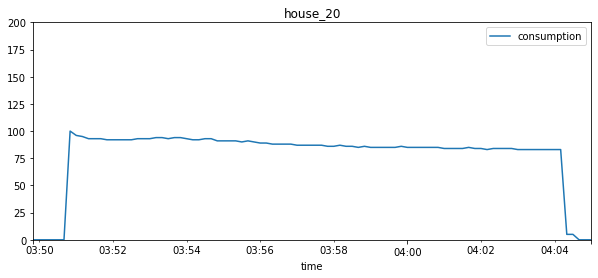

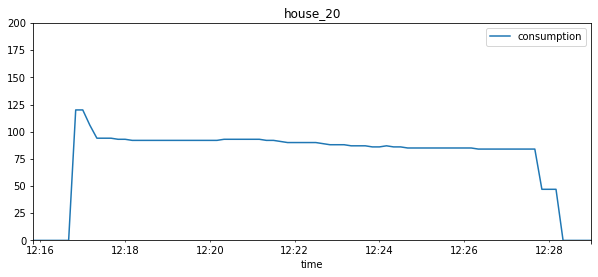

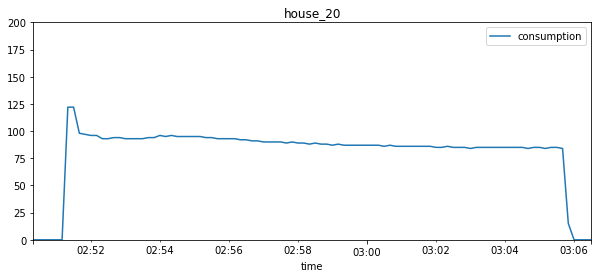

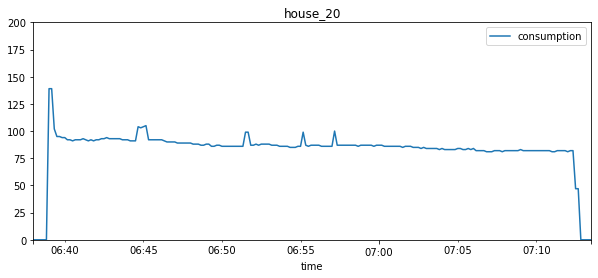

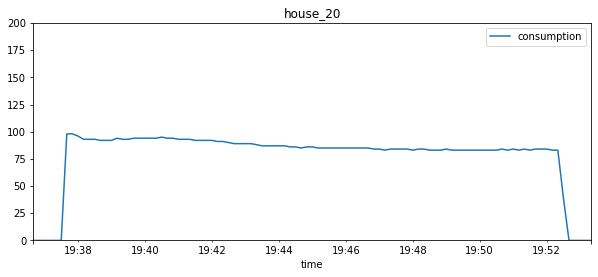

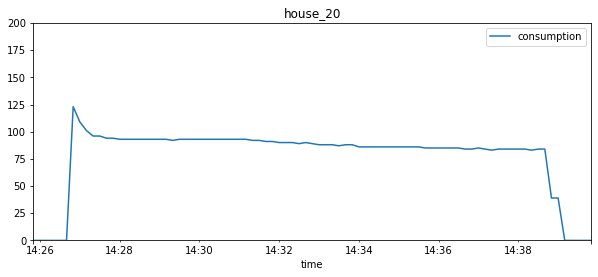

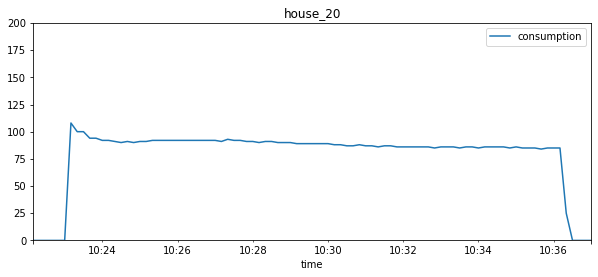

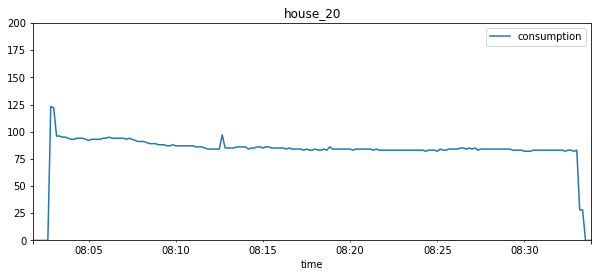

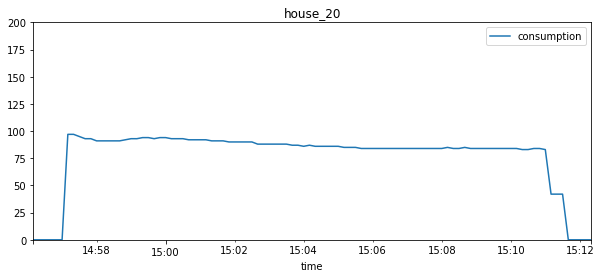

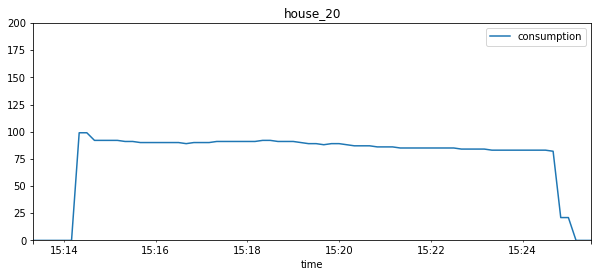

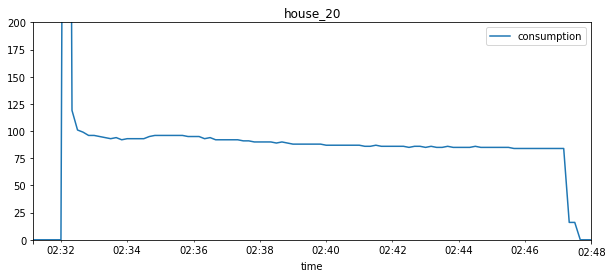

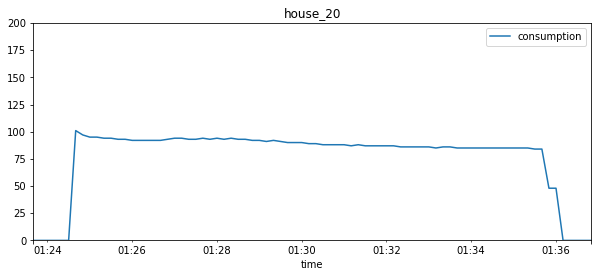

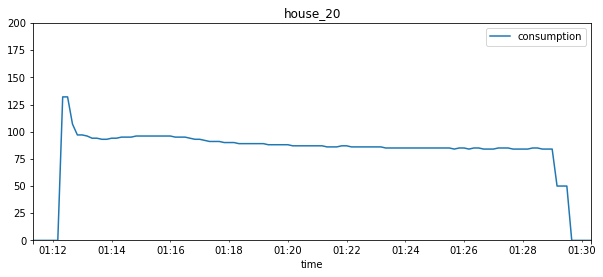

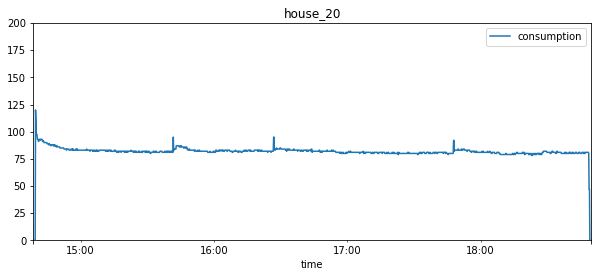

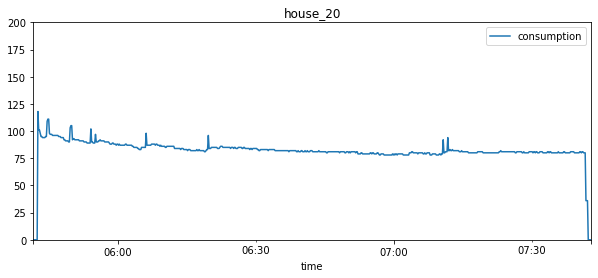

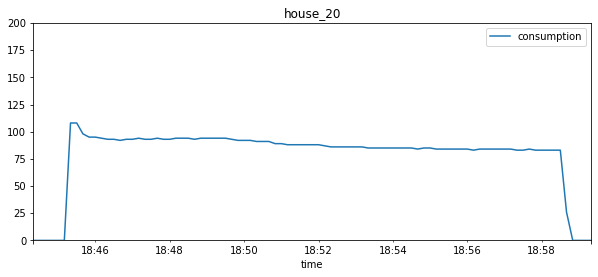

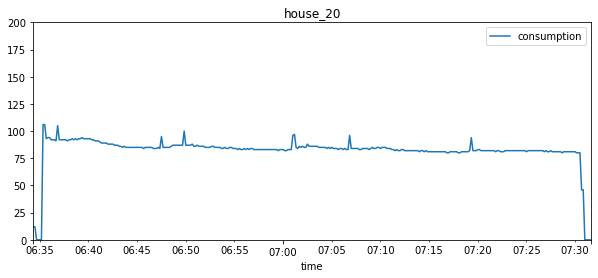

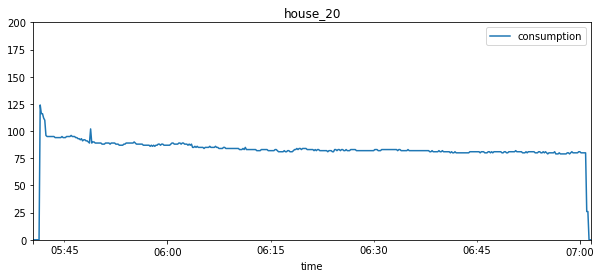

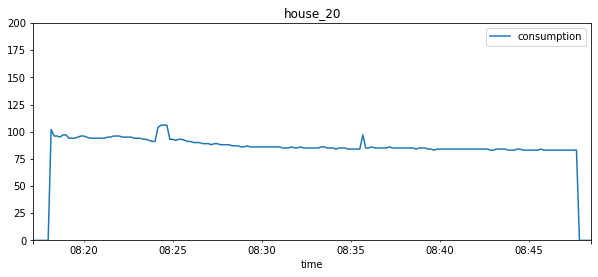

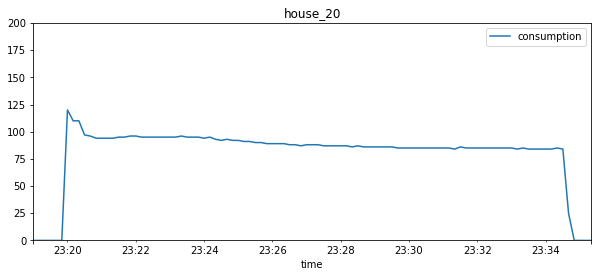

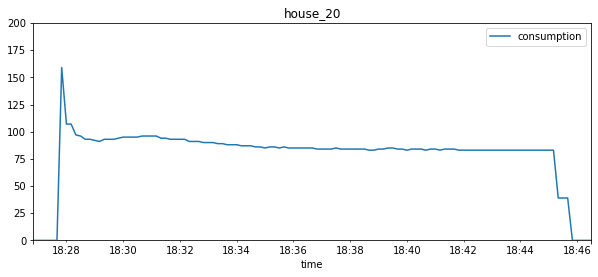

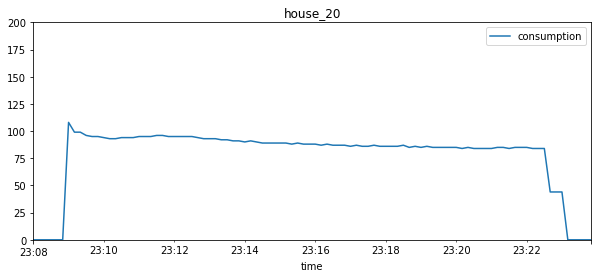

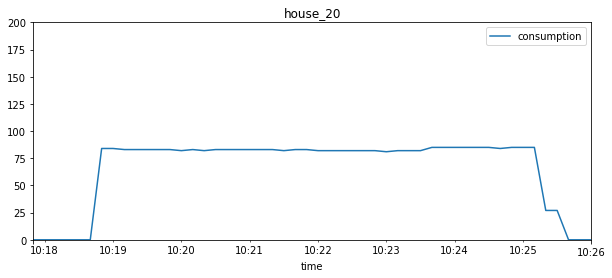

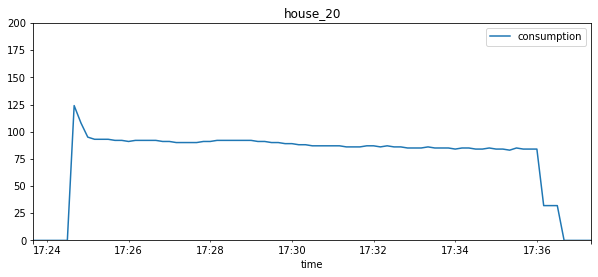

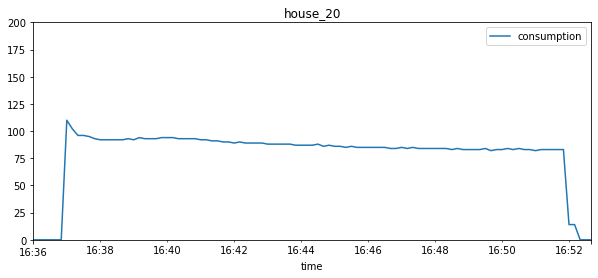

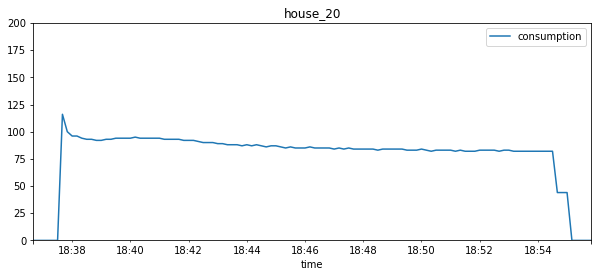

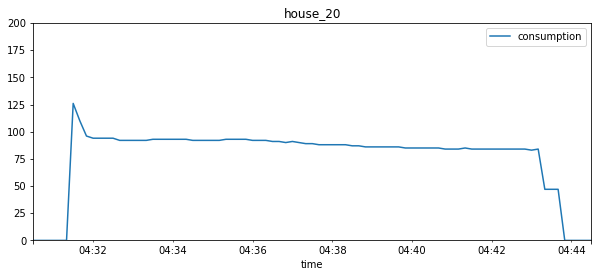

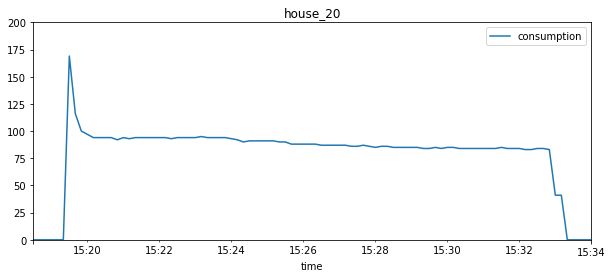

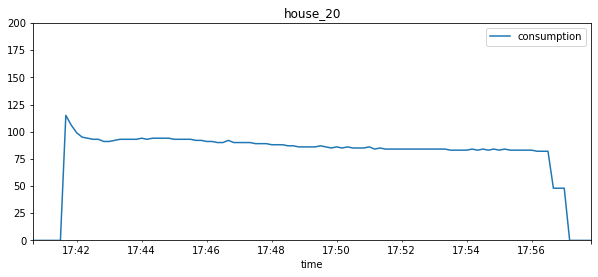

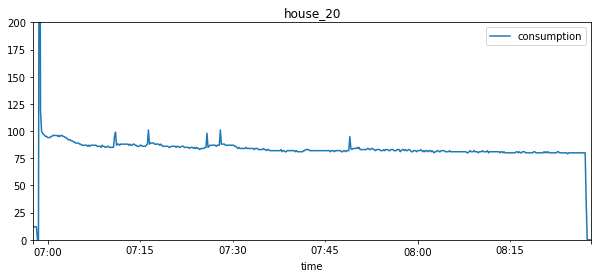

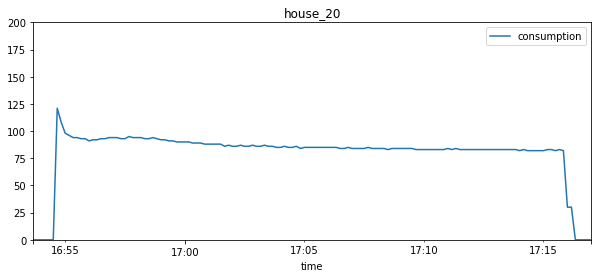

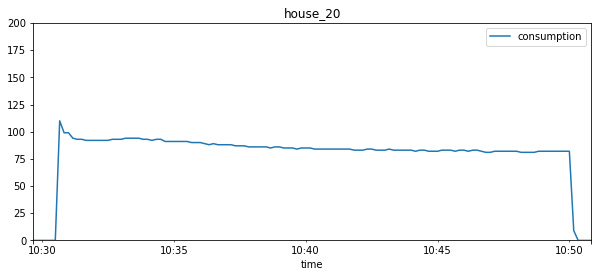

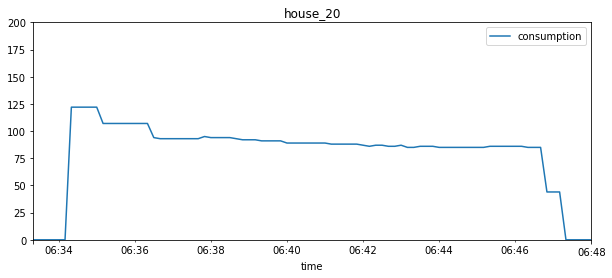

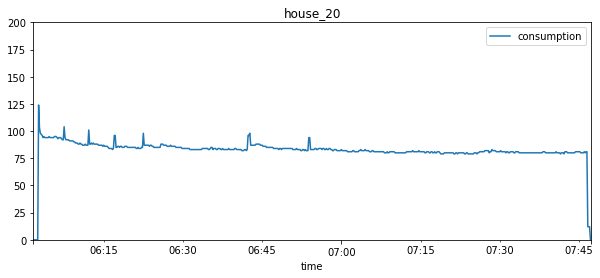

In [22]:
house=20
activations=random.sample(range(0, len(Refit_fridge_activations[house])),100)
df=Refit_fridges[house]
for activation in activations:
    beginning=Refit_fridge_activations[house][activation][0]
    end=Refit_fridge_activations[house][activation][1]
    ax=df.iloc[beginning-6:end+6].plot(x="time",y=['consumption'], figsize=(10,4),title="house_"+str(house))
    ax.set_ylim(0,200)

In [15]:
def activations_to_csv(activations,house_nb):
    df=pd.DataFrame(activations, columns =['beginning','end'])
    df.to_csv("Refit_activations/fridge/house_"+str(house_nb),index=False)

In [16]:
pool = mp.Pool(processes = 3)
result=pool.starmap(activations_to_csv,((Refit_fridge_activations[i],i) for i in Refit_fridge_activations.keys()))

In [18]:
data=Refit_fridge_activations[1]
df = pd.DataFrame(data, columns =['beginning','end'])
print(df)

      beginning      end
0             1       81
1           678      849
2          1401     1572
3          3050     3216
4          3907     4074
...         ...      ...
6151    5517001  5517180
6152    5517788  5517967
6153    5518585  5518762
6154    5519336  5519514
6155    5520110  5520291

[6156 rows x 2 columns]


In [19]:
def csv_to_activations(file_title):
    df=pd.read_table(file_title, sep="," )
    df = df[['beginning', 'end']]
    activation = [tuple(x) for x in df.to_numpy()]
    return(activation)

In [21]:
Refit_fridge_activations={}
for house_nb in Refit_fridges.keys():
    Refit_fridge_activations[house_nb]=csv_to_activations("Refit_activations/fridge/house_"+str(house_nb))

In [24]:
Refit_fridge_activations.keys()

dict_keys([1, 4, 7, 8, 11, 18, 20])

In [25]:
def get_durations(activations):
    durations=[]
    for activation in activations:
        durations.append(round((activation[1]-activation[0])/6))
    return (durations)

In [26]:
Refit_fridges_durations=[]
for house in Refit_fridges.keys():
    Refit_fridges_durations.append(get_durations(Refit_fridge_activations[house]))

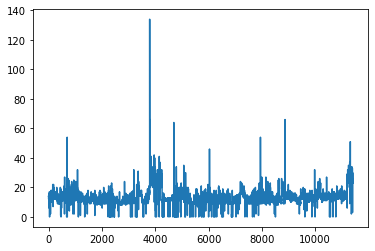

In [31]:
plt.plot(Refit_fridges_durations[2])

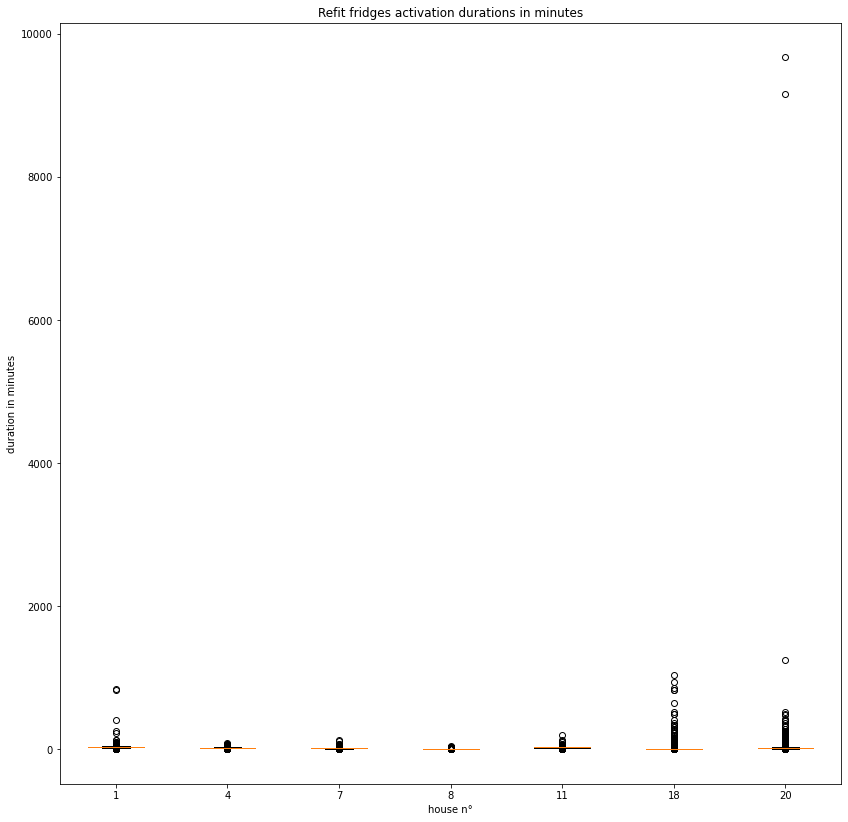

In [39]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridges activation durations in minutes')
ax7.boxplot(Refit_fridges_durations)
#ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridges.keys())
plt.savefig('Refit_fridges_activation_durations_in_minutes_all.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()

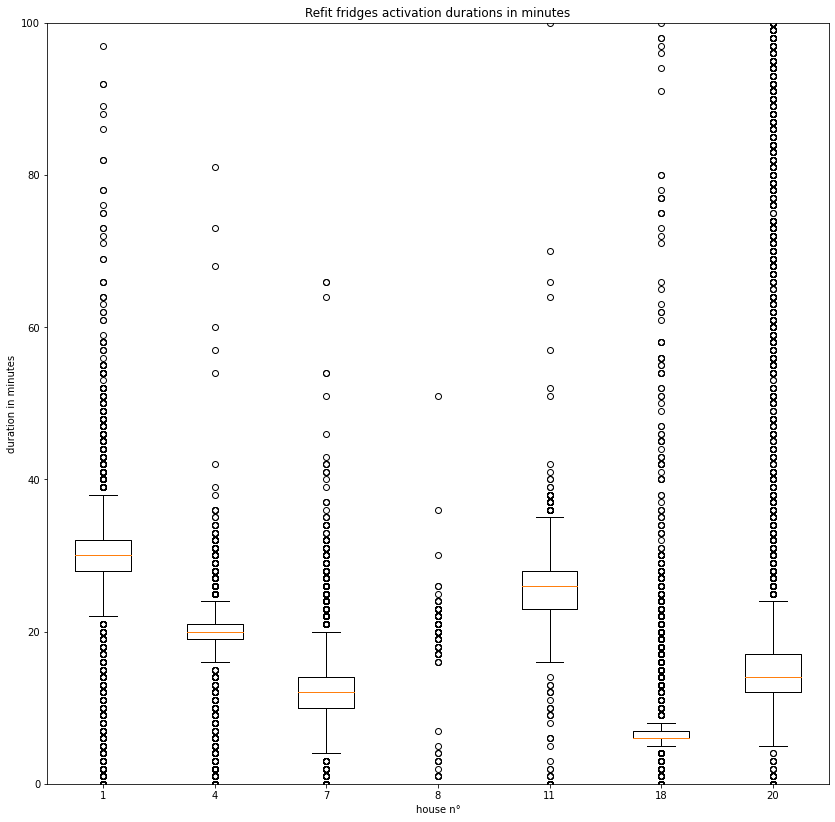

In [37]:
fig7, ax7 = plt.subplots(figsize=(14,14))
ax7.set_title('Refit fridges activation durations in minutes')
ax7.boxplot(Refit_fridges_durations)
ax7.set_ylim(0,100)
ax7.set_xticklabels(Refit_fridges.keys())
plt.savefig('Refit_fridges_activation_durations_in_minutes.jpg',dpi=184)
plt.ylabel("duration in minutes")
plt.xlabel("house n°")
plt.show()